In [3]:
#importing necessary libraries
import pandas as pd
import numpy as np
import statsmodels.formula.api as smf
from sklearn.preprocessing import StandardScaler, OrdinalEncoder, OneHotEncoder, LabelEncoder, PowerTransformer
from sklearn.impute import SimpleImputer
from sklearn.compose import make_column_transformer
from sklearn.linear_model import LinearRegression, LogisticRegression
from sklearn.model_selection import train_test_split, RandomizedSearchCV, GridSearchCV
from sklearn.feature_selection import SelectPercentile, chi2
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score,roc_curve, roc_auc_score, plot_roc_curve
from sklearn.ensemble import AdaBoostRegressor, GradientBoostingRegressor,RandomForestClassifier, BaggingClassifier
from sklearn.metrics import confusion_matrix, classification_report
from scipy.stats import norm, stats
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.decomposition import PCA
from sklearn.pipeline import Pipeline
from sklearn.model_selection import cross_val_score
from sklearn.metrics import accuracy_score
from sklearn.svm import SVC
import statistics as st
import statsmodels.api as sm
import seaborn as sns
import matplotlib.pyplot as plt
import pickle
import time


#import plotty
import warnings
warnings.filterwarnings('ignore')

In [4]:
df = pd.read_csv("https://raw.githubusercontent.com/dsrscientist/dataset1/master/census_income.csv")
df.head() #read csv file

,Age,Workclass,Fnlwgt,Education,Education_num,Marital_status,Occupation,Relationship,Race,Sex,Capital_gain,Capital_loss,Hours_per_week,Native_country,Income
0,50,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,<=50K
1,38,Private,215646,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,<=50K
2,53,Private,234721,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,<=50K
3,28,Private,338409,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,<=50K
4,37,Private,284582,Masters,14,Married-civ-spouse,Exec-managerial,Wife,White,Female,0,0,40,United-States,<=50K


Documentation:
1. Out of 15 columns, 9 columns are in object form
2. There is no null values
3. 24 duplicate values are found
4. By using Encoder techniques, we need to convert our Label into 1 and 0 form
5. it is clear, this classification problem
6. 'Fnlwgt' values are very high as compare to other columns, so, we need scalling also.
7. High skewness in 'captial_gain' and 'Capital_loss'
8. Almost, every columns are inter related to each other

In [5]:
df.shape #check the shape of the dataset

(32560, 15)

In [6]:
df.columns #check the columns

Index(['Age', 'Workclass', 'Fnlwgt', 'Education', 'Education_num',
       'Marital_status', 'Occupation', 'Relationship', 'Race', 'Sex',
       'Capital_gain', 'Capital_loss', 'Hours_per_week', 'Native_country',
       'Income'],
      dtype='object')

In [7]:
df.describe() #check the parameters

,Age,Fnlwgt,Education_num,Capital_gain,Capital_loss,Hours_per_week
count,32560.000000,3.256000e+04,32560.000000,32560.000000,32560.000000,32560.000000
mean,38.581634,1.897818e+05,10.080590,1077.615172,87.306511,40.437469
std,13.640642,1.055498e+05,2.572709,7385.402999,402.966116,12.347618
min,17.000000,1.228500e+04,1.000000,0.000000,0.000000,1.000000
25%,28.000000,1.178315e+05,9.000000,0.000000,0.000000,40.000000
50%,37.000000,1.783630e+05,10.000000,0.000000,0.000000,40.000000
75%,48.000000,2.370545e+05,12.000000,0.000000,0.000000,45.000000
max,90.000000,1.484705e+06,16.000000,99999.000000,4356.000000,99.000000


In [8]:
df.info() #check the null values and Dtype

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32560 entries, 0 to 32559
Data columns (total 15 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   Age             32560 non-null  int64 
 1   Workclass       32560 non-null  object
 2   Fnlwgt          32560 non-null  int64 
 3   Education       32560 non-null  object
 4   Education_num   32560 non-null  int64 
 5   Marital_status  32560 non-null  object
 6   Occupation      32560 non-null  object
 7   Relationship    32560 non-null  object
 8   Race            32560 non-null  object
 9   Sex             32560 non-null  object
 10  Capital_gain    32560 non-null  int64 
 11  Capital_loss    32560 non-null  int64 
 12  Hours_per_week  32560 non-null  int64 
 13  Native_country  32560 non-null  object
 14  Income          32560 non-null  object
dtypes: int64(6), object(9)
memory usage: 3.7+ MB


In [9]:
df.duplicated().sum() #check the duplicate rows

24

In [10]:
df.drop_duplicates().head() #drop duplicate rows

,Age,Workclass,Fnlwgt,Education,Education_num,Marital_status,Occupation,Relationship,Race,Sex,Capital_gain,Capital_loss,Hours_per_week,Native_country,Income
0,50,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,<=50K
1,38,Private,215646,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,<=50K
2,53,Private,234721,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,<=50K
3,28,Private,338409,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,<=50K
4,37,Private,284582,Masters,14,Married-civ-spouse,Exec-managerial,Wife,White,Female,0,0,40,United-States,<=50K


In [11]:
df.isnull().sum() #check the null values in dataset

Age               0
Workclass         0
Fnlwgt            0
Education         0
Education_num     0
Marital_status    0
Occupation        0
Relationship      0
Race              0
Sex               0
Capital_gain      0
Capital_loss      0
Hours_per_week    0
Native_country    0
Income            0
dtype: int64

# Column1: Age

In [12]:
df['Age'].unique() #check the unique values

array([50, 38, 53, 28, 37, 49, 52, 31, 42, 30, 23, 32, 40, 34, 25, 43, 54,
       35, 59, 56, 19, 39, 20, 45, 22, 48, 21, 24, 57, 44, 41, 29, 18, 47,
       46, 36, 79, 27, 67, 33, 76, 17, 55, 61, 70, 64, 71, 68, 66, 51, 58,
       26, 60, 90, 75, 65, 77, 62, 63, 80, 72, 74, 69, 73, 81, 78, 88, 82,
       83, 84, 85, 86, 87], dtype=int64)

In [13]:
df['Age'].value_counts()#check the counts of the unique values

36    898
31    888
34    886
23    877
35    876
     ... 
83      6
85      3
88      3
86      1
87      1
Name: Age, Length: 73, dtype: int64

In [14]:
df['Age'].all()#check the zero values

True

In [15]:
df['Age'].isnull().sum()#check the null values

0

In [16]:
df['Age'].skew()#check the skewness

0.5587376395152729

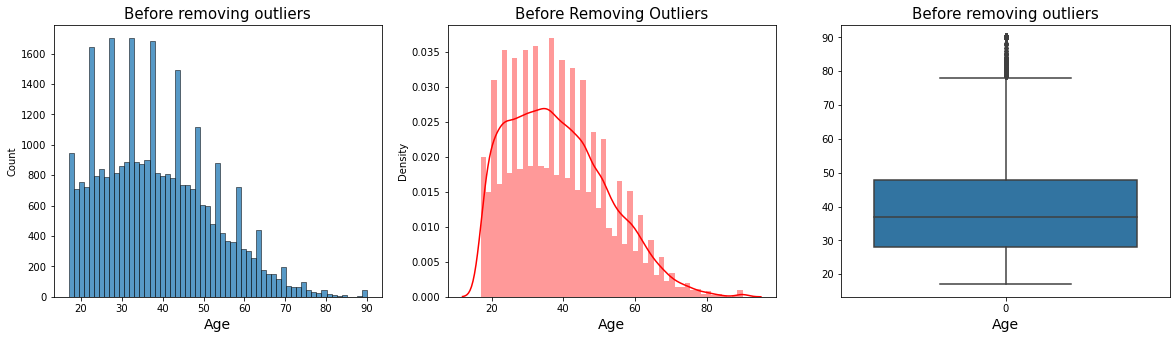

In [17]:
#Visualization
plt.figure(figsize=(20,5))
plt.subplot(1,3,1)
sns.histplot(df['Age']) #visualize the outliers by using histplot
plt.title('Before removing outliers', fontsize=15)
plt.xlabel('Age', fontsize= 14)

plt.subplot(1,3,2)
sns.distplot(df['Age'], color='r') #visualize the normalization curve by using distplot
plt.title('Before Removing Outliers', fontsize=15)
plt.xlabel('Age', fontsize= 14)

plt.subplot(1,3,3)
sns.boxplot(data = df['Age']) #visualize the outliers by using boxplot
plt.title('Before removing outliers', fontsize=15)
plt.xlabel('Age', fontsize= 14)
plt.show()

In [18]:
# Calculate mean, median, mode and std to check the normalization curve
print('Mean of the column:----->',df['Age'].mean())
print('Median of the column:----->',df['Age'].median())
print('Mode of the column:----->',st.mode(df['Age']))
print('std of the column:----->',df['Age'].std())

Mean of the column:-----> 38.581633906633904
Median of the column:-----> 37.0
Mode of the column:-----> 36
std of the column:-----> 13.640641827464046


In [19]:
#Detecting the outlier by using iqr method and removing them.
q1 = np.percentile(df['Age'], 25,
                   interpolation = 'midpoint')
 
q3 = np.percentile(df['Age'], 70,
                   interpolation = 'midpoint')
iqr = q3 - q1
print('Inter quartile range:------>',iqr)
print("\n",'*'*50)

# higher side 
higher_side = df['Age'] >= (q3+1.5*iqr)
print('Higher range:-\n',np.where(higher_side))
print("\n",'*'*50)

# lower side 
lower_side = df['Age'] <= (q1-1.5*iqr)
print('Lower range:- \n',np.where(lower_side))

Inter quartile range:------> 17.0

 **************************************************
Higher range:-
 (array([   73,    99,   156,   221,   227,   315,   323,   429,   498,
         526,   551,   646,   832,   833,   871,   917,   977,  1033,
        1039,  1167,  1228,  1262,  1337,  1457,  1561,  1578,  1644,
        1709,  1767,  1807,  1934,  1950,  1996,  2002,  2153,  2188,
        2302,  2371,  2482,  2485,  2490,  2591,  2614,  2683,  2714,
        2753,  2883,  2890,  2905,  2940,  2966,  2998,  3035,  3064,
        3081,  3191,  3210,  3212,  3269,  3290,  3296,  3337,  3536,
        3587,  3601,  3605,  3623,  3632,  3670,  3772,  3776,  3919,
        3930,  3962,  3989,  4017,  4069,  4108,  4195,  4235,  4272,
        4463,  4612,  4719,  4758,  4833,  4850,  5008,  5103,  5155,
        5197,  5200,  5271,  5290,  5293,  5339,  5369,  5405,  5410,
        5415,  5589,  5664,  5678,  5686,  5807,  5831,  5854,  5915,
        5936,  5999,  6034,  6172,  6179,  6213,  6231, 

In [20]:
#First print the old shape and then compare
print("old Shape:------> ", df.shape)
#removing the outliers
high=np.where(higher_side)
low=np.where(lower_side)
df=df.drop(df.index[high])
df=df.drop(df.index[low])
 
print("New Shape:------> ", df.shape)

old Shape:------>  (32560, 15)
New Shape:------>  (32020, 15)


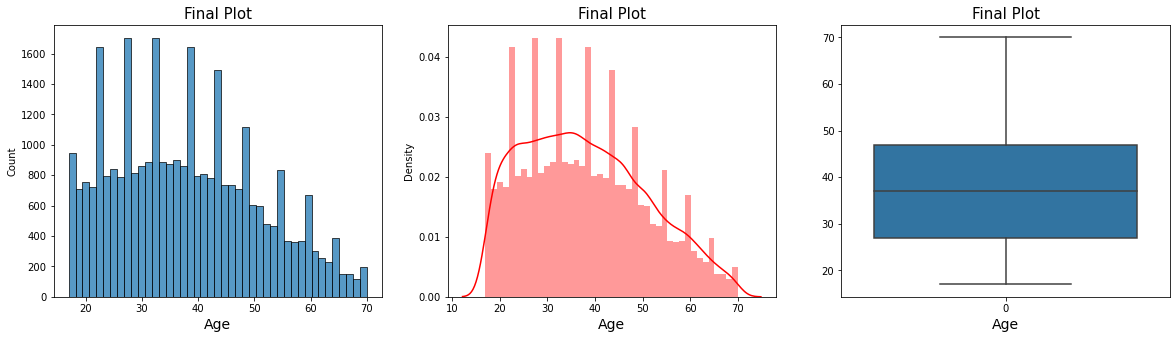

In [21]:
#Visualization
plt.figure(figsize=(20,5))
plt.subplot(1,3,1)
sns.histplot(df['Age']) #visualize the outliers by using histplot
plt.title('Final Plot', fontsize=15)
plt.xlabel('Age', fontsize= 14)

plt.subplot(1,3,2)
sns.distplot(df['Age'], color='r') #visualize the normalization curve by using distplot
plt.title('Final Plot', fontsize=15)
plt.xlabel('Age', fontsize= 14)

plt.subplot(1,3,3)
sns.boxplot(data = df['Age']) #visualize the outliers by using boxplot
plt.title('Final Plot', fontsize=15)
plt.xlabel('Age', fontsize= 14)
plt.show()

In [22]:
# Calculate mean, median, mode and std to check the normalization curve
print('Mean of the column:----->',df['Age'].mean())
print('Median of the column:----->',df['Age'].median())
print('Mode of the column:----->',st.mode(df['Age']))
print('std of the column:----->',df['Age'].std())

Mean of the column:-----> 37.94303560274828
Median of the column:-----> 37.0
Mode of the column:-----> 36
std of the column:-----> 12.811422611411793


In [23]:
df['Age'].skew() #now, check the skewness
#skewness is improved from 0.55 to 0.37

0.37230954317239373

In [24]:
df.groupby('Age')['Income'].value_counts() #check the relationship between column and label
#Here, we can see that, maximum peoples are below 20
#As the age grow their Income grows

Age  Income
17    <=50K    395
18    <=50K    550
19    <=50K    710
      >50K       2
20    <=50K    753
              ... 
68    >50K      27
69    <=50K     87
      >50K      21
70    <=50K     70
      >50K      19
Name: Income, Length: 105, dtype: int64

Text(0, 0.5, 'Age')

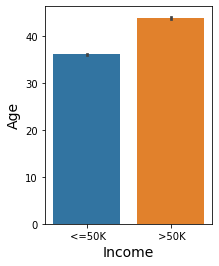

In [25]:
#visualize this column by Barplot
plt.figure(figsize=(3,4))
sns.barplot(y= 'Age',x= 'Income', data=df)
plt.xlabel('Income', fontsize = 14)
plt.ylabel('Age', fontsize = 14)

Text(0, 0.5, 'Age')

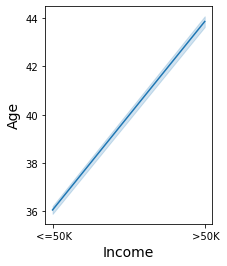

In [26]:
#visualize this column by lineplot
plt.figure(figsize=(3,4))
sns.lineplot(y= 'Age',x= 'Income', data=df)
plt.xlabel('Income', fontsize = 14)
plt.ylabel('Age', fontsize = 14)

Observation:
1. No zero values found
2. no null values found
3. Skewness is found from 0.55 to 0.37
4. mean, median and mode values are improved
5. maximum peoples are under 20 
6. As age grows their Income grows

In [27]:
#check the shape of our dataset
print('Actual shape of our Dataset now :-------->', df.shape)

Actual shape of our Dataset now :--------> (32020, 15)


# Column2: Workclass

In [28]:
df['Workclass'].unique()#check the unique values

array([' Self-emp-not-inc', ' Private', ' State-gov', ' Federal-gov',
       ' Local-gov', ' ?', ' Self-emp-inc', ' Without-pay',
       ' Never-worked'], dtype=object)

In [29]:
df['Workclass'].value_counts()#check the counts of the unique values

 Private             22486
 Self-emp-not-inc     2446
 Local-gov            2065
 ?                    1686
 State-gov            1287
 Self-emp-inc         1081
 Federal-gov           949
 Without-pay            13
 Never-worked            7
Name: Workclass, dtype: int64

In [30]:
df.drop(df[df['Workclass'] == ' ?'].index,inplace=True) # drop this '?' value 

In [31]:
df['Workclass'].value_counts()#check the counts of the unique values

 Private             22486
 Self-emp-not-inc     2446
 Local-gov            2065
 State-gov            1287
 Self-emp-inc         1081
 Federal-gov           949
 Without-pay            13
 Never-worked            7
Name: Workclass, dtype: int64

In [32]:
df['Workclass'].value_counts(normalize = True)#check the counts of the unique values

 Private             0.741280
 Self-emp-not-inc    0.080636
 Local-gov           0.068075
 State-gov           0.042428
 Self-emp-inc        0.035637
 Federal-gov         0.031285
 Without-pay         0.000429
 Never-worked        0.000231
Name: Workclass, dtype: float64

In [33]:
df['Workclass'].isnull().sum() #check the null values

0

Text(0, 0.5, 'Workclass')

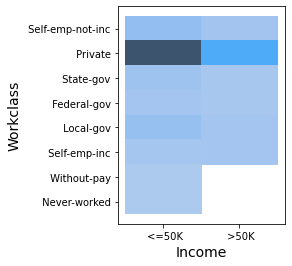

In [34]:
#visualize this column by lineplot
plt.figure(figsize=(3,4))
sns.histplot(y= 'Workclass',x= 'Income', data=df)
plt.xlabel('Income', fontsize = 14)
plt.ylabel('Workclass', fontsize = 14)

Text(0, 0.5, 'Workclass')

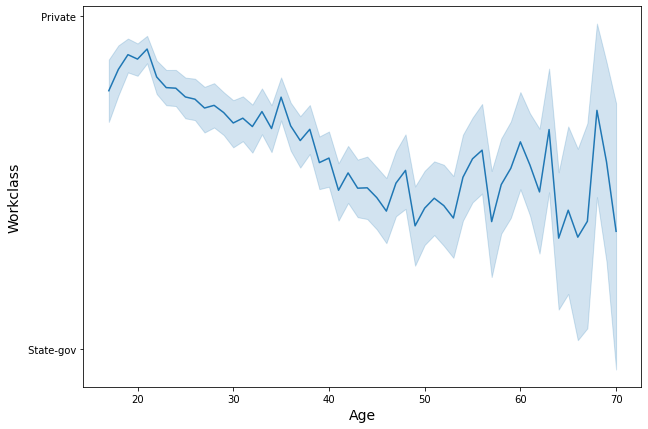

In [35]:
#visualize this column by lineplot
plt.figure(figsize=(10,7))
sns.lineplot(y= 'Workclass',x= 'Age', data=df)
plt.xlabel('Age', fontsize = 14)
plt.ylabel('Workclass', fontsize = 14)

In [36]:
df.groupby('Age')['Workclass'].value_counts().sort_index(ascending=True).head(20)
#check the relationship between Age and workclass

Age  Workclass        
17    Federal-gov           1
      Local-gov            14
      Never-worked          1
      Private             300
      Self-emp-inc          7
      Self-emp-not-inc      6
      State-gov             2
18    Federal-gov           3
      Local-gov            10
      Never-worked          3
      Private             413
      Self-emp-inc          6
      Self-emp-not-inc     14
      State-gov             9
19    Federal-gov           5
      Local-gov            11
      Private             540
      Self-emp-inc          3
      Self-emp-not-inc     17
      State-gov            21
Name: Workclass, dtype: int64

In [37]:
df.groupby('Age')['Workclass'].value_counts().sort_index(ascending=False).head(20)
#check the relationship between Age and workclass

Age  Workclass        
70    State-gov            1
      Self-emp-not-inc    14
      Self-emp-inc        11
      Private             35
      Local-gov            3
      Federal-gov          1
69    State-gov            7
      Self-emp-not-inc    15
      Self-emp-inc         5
      Private             45
      Local-gov            7
      Federal-gov          1
68    Without-pay          1
      State-gov            3
      Self-emp-not-inc    17
      Self-emp-inc         4
      Private             60
      Local-gov            5
      Federal-gov          2
67    Without-pay          1
Name: Workclass, dtype: int64

Observation:
1. No null values are found
2. We drop this '?'
3. people who have less than 50k income are more in private sectors
4. people who have age less 20 are more in private sectors
5. people who have age greater than 60 are less in numbers but still they are more in private sectors

In [38]:
#check the shape of our dataset
print('Actual shape of our Dataset now :-------->', df.shape)

Actual shape of our Dataset now :--------> (30334, 15)


# Column3: Fnlwgt

In [39]:
df['Fnlwgt'].unique()#check the unique values

array([ 83311, 215646, 234721, ...,  84661, 257302, 201490], dtype=int64)

In [40]:
df['Fnlwgt'].value_counts()#check the counts of the unique values

164190    13
203488    13
113364    12
123011    12
126675    12
          ..
207267     1
203173     1
98726      1
219565     1
145522     1
Name: Fnlwgt, Length: 20163, dtype: int64

In [41]:
df['Fnlwgt'].all() #check the zero value

True

In [42]:
df['Fnlwgt'].isnull().sum() #check the null values

0

In [43]:
df['Fnlwgt'].skew() #check the skewness

1.4592032422749057

In [44]:
# calculate the mean, median, mode to check how much our column is skewed  
print('mean of the column-------> ',df['Fnlwgt'].mean())
print('median of the column--------> ',df['Fnlwgt'].median())
print('mode of the column--------> ', st.mode(df['Fnlwgt']))
print('std of the column:----->',df['Fnlwgt'].std())

mean of the column------->  190102.7294455067
median of the column-------->  178747.0
mode of the column-------->  164190
std of the column:-----> 105620.66070813923


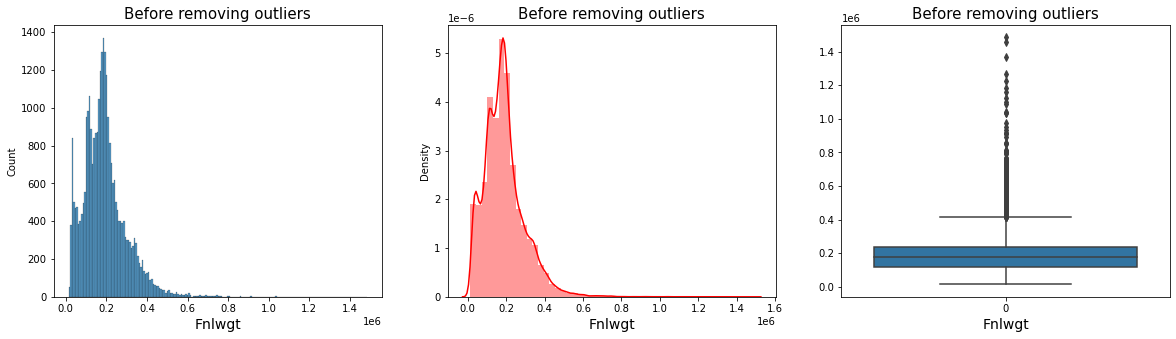

In [45]:
#visualization
plt.figure(figsize=(20,5))
plt.subplot(1,3,1)
sns.histplot(df['Fnlwgt']) #visualize the outliers by using histplot
plt.title('Before removing outliers', fontsize=15)
plt.xlabel('Fnlwgt', fontsize= 14)

plt.subplot(1,3,2)
sns.distplot(df['Fnlwgt'], color='r') #visualize the normalization curve by using distplot
plt.title('Before removing outliers', fontsize=15)
plt.xlabel('Fnlwgt', fontsize= 14)

plt.subplot(1,3,3)
sns.boxplot(data = df['Fnlwgt']) #visualize the outliers by using boxplot
plt.title('Before removing outliers', fontsize=15)
plt.xlabel('Fnlwgt', fontsize= 14)
plt.show()

In [46]:
#Detecting the outlier by using iqr method and removing them.
q1 = np.percentile(df['Fnlwgt'], 25,
                   interpolation = 'midpoint')
 
q3 = np.percentile(df['Fnlwgt'], 70,
                   interpolation = 'midpoint')
iqr = q3 - q1
print('Inter quartile range:------>',iqr)
print("\n",'*'*50)

# higher side 
higher_side = df['Fnlwgt'] >= (q3+1.5*iqr)
print('Higher range:-\n',np.where(higher_side))
print("\n",'*'*50)

# lower side 
lower_side = df['Fnlwgt'] <= (q1-1.5*iqr)
print('Lower range:- \n',np.where(lower_side))

Inter quartile range:------> 102114.5

 **************************************************
Higher range:-
 (array([   30,    35,    38, ..., 30276, 30279, 30290], dtype=int64),)

 **************************************************
Lower range:- 
 (array([], dtype=int64),)


In [47]:
#First print the old shape and then compare
print("old Shape:------> ", df.shape)
#removing the outliers
high=np.where(higher_side)
low=np.where(lower_side)
df=df.drop(df.index[high])
df=df.drop(df.index[low])
 
print("New Shape:------> ", df.shape)

old Shape:------>  (30334, 15)
New Shape:------>  (28642, 15)


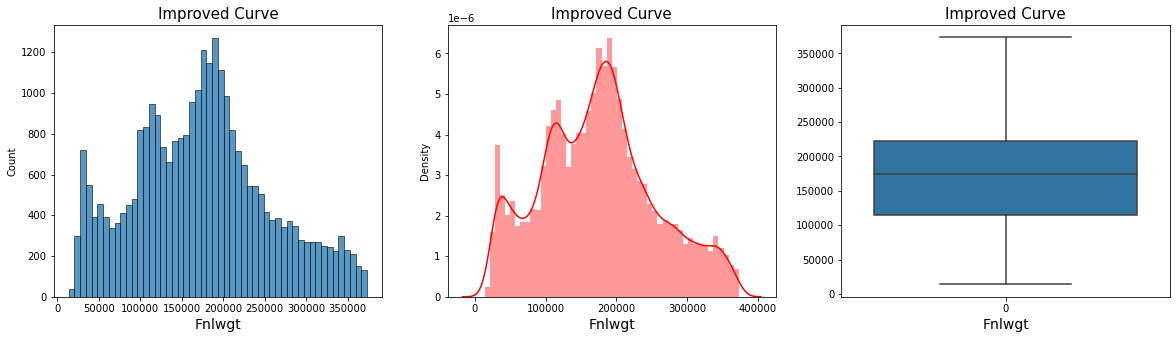

In [48]:
#visualization
plt.figure(figsize=(20,5))
plt.subplot(1,3,1)
sns.histplot(df['Fnlwgt']) #visualize the outliers by using histplot
plt.title('Improved Curve', fontsize=15)
plt.xlabel('Fnlwgt', fontsize= 14)

plt.subplot(1,3,2)
sns.distplot(df['Fnlwgt'], color='r') #visualize the normalization curve by using distplot
plt.title('Improved Curve', fontsize=15)
plt.xlabel('Fnlwgt', fontsize= 14)

plt.subplot(1,3,3)
sns.boxplot(data = df['Fnlwgt']) #visualize the outliers by using boxplot
plt.title('Improved Curve', fontsize=15)
plt.xlabel('Fnlwgt', fontsize= 14)
plt.show()

In [49]:
# calculate the mean, median, mode to check how much our column is skewed  
print('mean of the column-------> ',df['Fnlwgt'].mean())
print('median of the column--------> ',df['Fnlwgt'].median())
print('mode of the column--------> ', st.mode(df['Fnlwgt']))
print('std of the column:----->',df['Fnlwgt'].std())

mean of the column------->  174246.15274771315
median of the column-------->  174352.0
mode of the column-------->  164190
std of the column:-----> 81175.73752783245


In [50]:
df['Fnlwgt'].skew() #now, check the skewness

0.24946256958996454

In [51]:
df['Fnlwgt'] = df['Fnlwgt'].replace(164190, df['Fnlwgt'].mean())
#improving normal curve

In [52]:
# calculate the mean, median, mode to check how much our column is skewed  
print('mean of the column-------> ',df['Fnlwgt'].mean())
print('median of the column--------> ',df['Fnlwgt'].median())
print('mode of the column--------> ', st.mode(df['Fnlwgt']))
print('std of the column:----->',df['Fnlwgt'].std())

mean of the column------->  174250.7170234523
median of the column-------->  174352.0
mode of the column-------->  174246.15274771315
std of the column:-----> 81175.45467502801


In [53]:
df['Fnlwgt'].skew() #now, check the skewness

0.24929734667374168

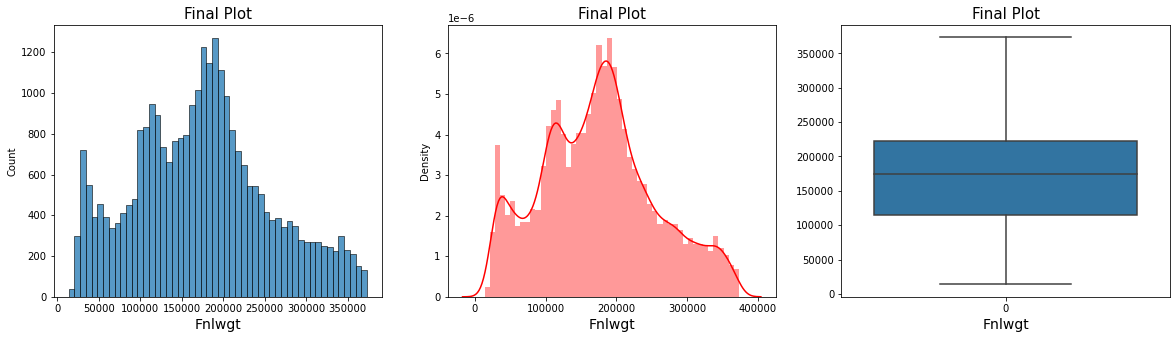

In [54]:
#visualization
plt.figure(figsize=(20,5))
plt.subplot(1,3,1)
sns.histplot(df['Fnlwgt']) #visualize the outliers by using histplot
plt.title('Final Plot', fontsize=15)
plt.xlabel('Fnlwgt', fontsize= 14)

plt.subplot(1,3,2)
sns.distplot(df['Fnlwgt'], color='r') #visualize the normalization curve by using distplot
plt.title('Final Plot', fontsize=15)
plt.xlabel('Fnlwgt', fontsize= 14)

plt.subplot(1,3,3)
sns.boxplot(data = df['Fnlwgt']) #visualize the outliers by using boxplot
plt.title('Final Plot', fontsize=15)
plt.xlabel('Fnlwgt', fontsize= 14)
plt.show()

Text(0, 0.5, 'Fnlwgt')

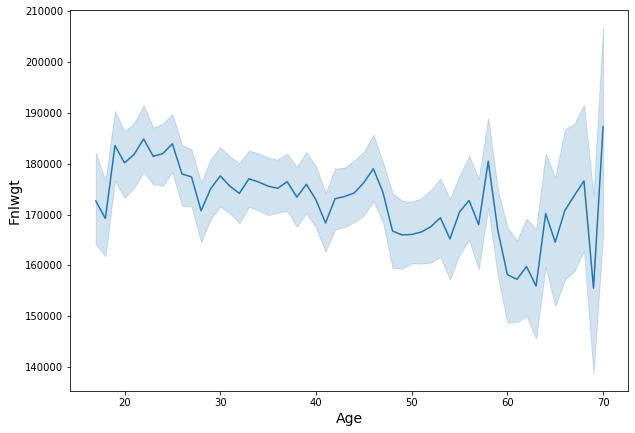

In [55]:
#visualize this column by lineplot
plt.figure(figsize=(10,7))
sns.lineplot(y= 'Fnlwgt',x= 'Age', data=df)
plt.xlabel('Age', fontsize = 14)
plt.ylabel('Fnlwgt', fontsize = 14)

Text(0, 0.5, 'Fnlwgt')

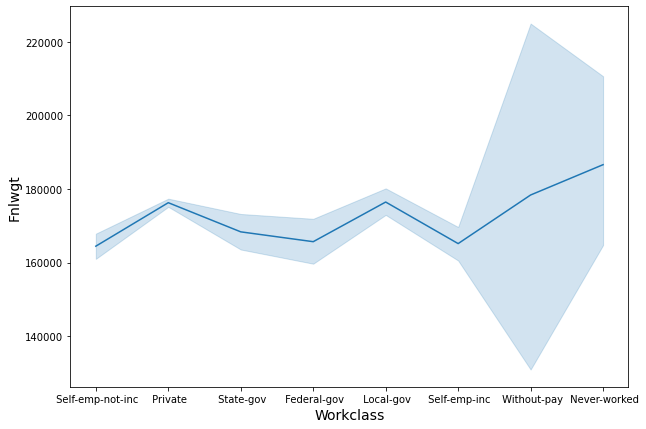

In [56]:
#visualize this column by lineplot
plt.figure(figsize=(10,7))
sns.lineplot(y= 'Fnlwgt',x= 'Workclass', data=df)
plt.xlabel('Workclass', fontsize = 14)
plt.ylabel('Fnlwgt', fontsize = 14)

Text(0, 0.5, 'Fnlwgt')

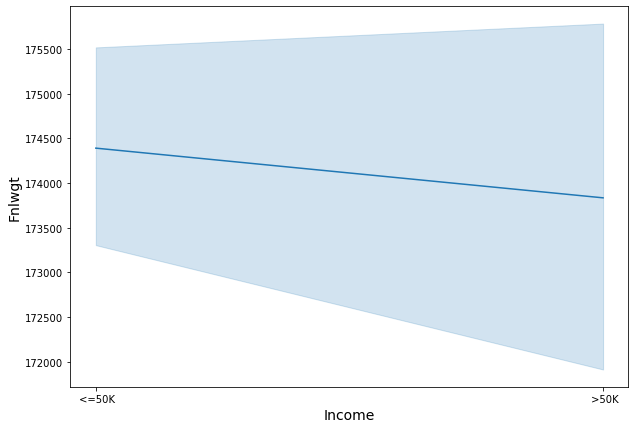

In [57]:
#visualize this column by lineplot
plt.figure(figsize=(10,7))
sns.lineplot(y= 'Fnlwgt',x= 'Income', data=df)
plt.xlabel('Income', fontsize = 14)
plt.ylabel('Fnlwgt', fontsize = 14)

Observation:
1. No zero values are found
2. No null values are found
3. Skewness is improved from 1.45 to 0.24
4. Outliers are removed
5. We can see, the people who are between 20-25 in their age, their final weight are more than others
6. people who never worked their final wieght is higher than others
7. Decreasing slope indicates that people whi have more income have high final weight than others

In [58]:
#check the shape of our dataset
print('Actual shape of our Dataset now :-------->', df.shape)

Actual shape of our Dataset now :--------> (28642, 15)


# Column4: Education

In [59]:
df['Education'].unique()#check the unique values

array([' Bachelors', ' HS-grad', ' 11th', ' Masters', ' 9th',
       ' Some-college', ' Assoc-acdm', ' Assoc-voc', ' 7th-8th',
       ' Doctorate', ' Prof-school', ' 5th-6th', ' 10th', ' Preschool',
       ' 12th', ' 1st-4th'], dtype=object)

In [60]:
df['Education'].value_counts()#check the counts of the unique values

 HS-grad         9306
 Some-college    6347
 Bachelors       4875
 Masters         1590
 Assoc-voc       1244
 11th             988
 Assoc-acdm       965
 10th             757
 Prof-school      528
 7th-8th          501
 9th              410
 Doctorate        359
 12th             353
 5th-6th          257
 1st-4th          123
 Preschool         39
Name: Education, dtype: int64

In [61]:
df['Education'].value_counts(normalize = True)#check the counts of the unique values

 HS-grad         0.324907
 Some-college    0.221598
 Bachelors       0.170205
 Masters         0.055513
 Assoc-voc       0.043433
 11th            0.034495
 Assoc-acdm      0.033692
 10th            0.026430
 Prof-school     0.018434
 7th-8th         0.017492
 9th             0.014315
 Doctorate       0.012534
 12th            0.012325
 5th-6th         0.008973
 1st-4th         0.004294
 Preschool       0.001362
Name: Education, dtype: float64

In [62]:
df['Education'].isnull().sum()#check the null values

0

Text(0, 0.5, 'Education')

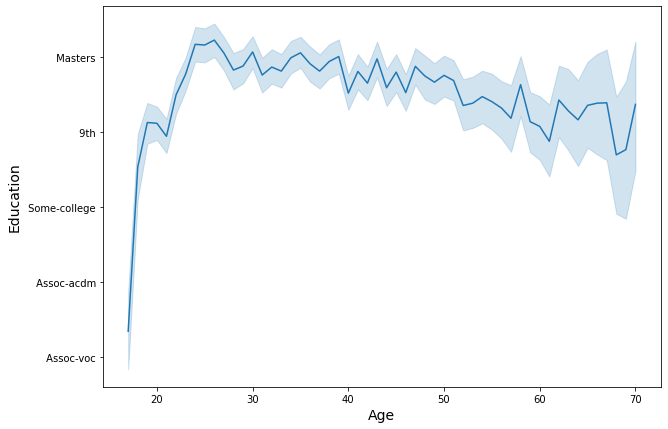

In [63]:
#visualize this column by lineplot
plt.figure(figsize=(10,7))
sns.lineplot(y= 'Education',x= 'Age', data=df)
plt.xlabel('Age', fontsize = 14)
plt.ylabel('Education', fontsize = 14)

Text(0, 0.5, 'Education')

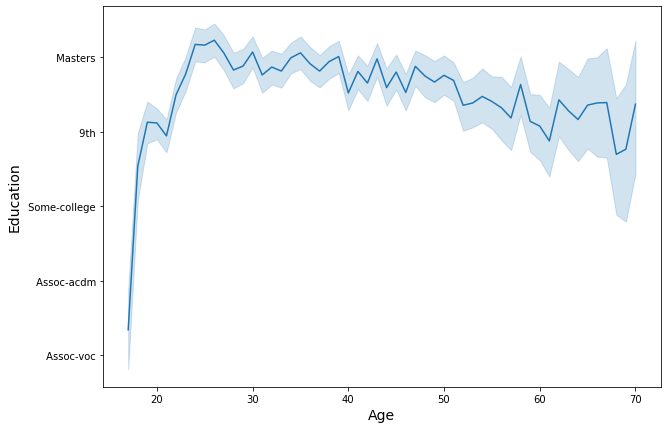

In [64]:
#visualize this column by lineplot
plt.figure(figsize=(10,7))
sns.lineplot(y= 'Education',x= 'Age', data=df)
plt.xlabel('Age', fontsize = 14)
plt.ylabel('Education', fontsize = 14)

Text(0, 0.5, 'Education')

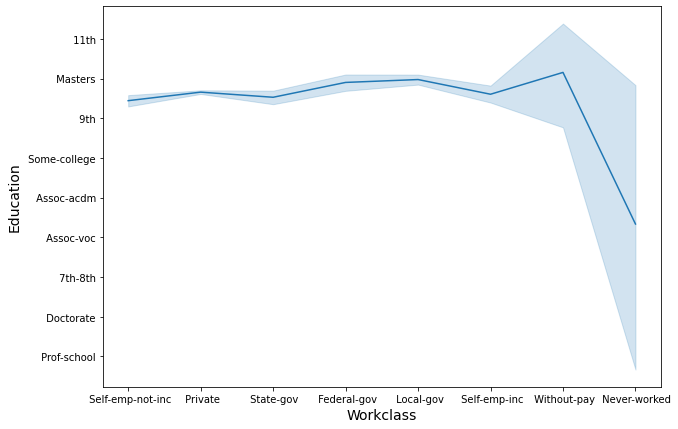

In [65]:
#visualize this column by lineplot
plt.figure(figsize=(10,7))
sns.lineplot(y= 'Education',x= 'Workclass', data=df)
plt.xlabel('Workclass', fontsize = 14)
plt.ylabel('Education', fontsize = 14)

Text(0, 0.5, 'Education')

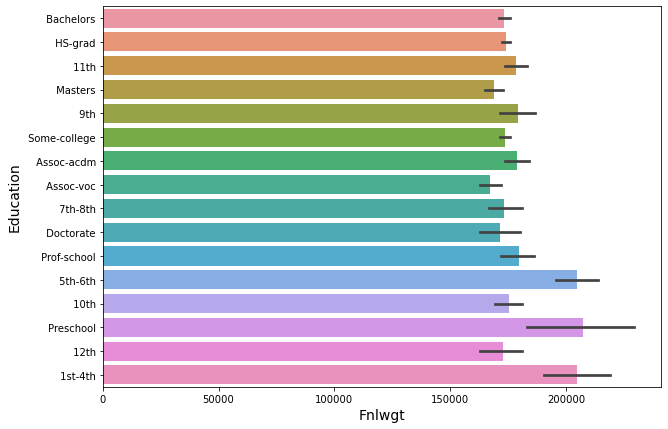

In [66]:
#visualize this column by barplot
plt.figure(figsize=(10,7))
sns.barplot(y= 'Education',x= 'Fnlwgt', data=df)
plt.xlabel('Fnlwgt', fontsize = 14)
plt.ylabel('Education', fontsize = 14)

Text(0, 0.5, 'Education')

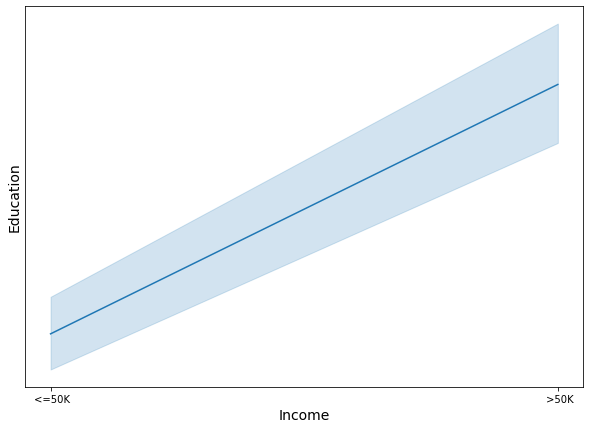

In [67]:
#visualize this column by lineplot
plt.figure(figsize=(10,7))
sns.lineplot(y= 'Education',x= 'Income', data=df)
plt.xlabel('Income', fontsize = 14)
plt.ylabel('Education', fontsize = 14)

Observation:
1. No null values are found
2. HS-grad peoples are more than others
3. As we can see, At the age of 25-30 peoples are more in masters category
4. We see almost constant graph between Education and workclass and at the end, it falls
5. peoples who are less educated have high final weight
6. there is linear graph between education and income, it means, education is more, income is more

In [68]:
#check the shape of our dataset
print('Actual shape of our Dataset now :-------->', df.shape)

Actual shape of our Dataset now :--------> (28642, 15)


# Column5: Education_num

In [69]:
df['Education_num'].unique()#check the unique values

array([13,  9,  7, 14,  5, 10, 12, 11,  4, 16, 15,  3,  6,  1,  8,  2],
      dtype=int64)

In [70]:
df['Education_num'].value_counts()#check the counts of the unique values

9     9306
10    6347
13    4875
14    1590
11    1244
7      988
12     965
6      757
15     528
4      501
5      410
16     359
8      353
3      257
2      123
1       39
Name: Education_num, dtype: int64

In [71]:
df['Education_num'].isnull().sum()#check the null values

0

In [72]:
df['Education_num'].all() #check the zero values

True

Text(0, 0.5, 'Education_num')

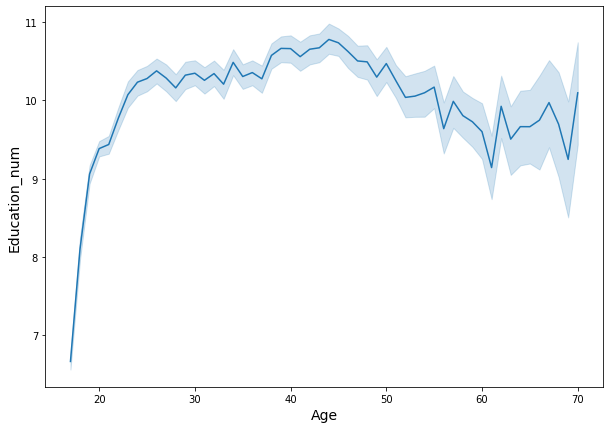

In [73]:
#visualize this column by lineplot
plt.figure(figsize=(10,7))
sns.lineplot(y= 'Education_num',x= 'Age', data=df)
plt.xlabel('Age', fontsize = 14)
plt.ylabel('Education_num', fontsize = 14)

Text(0.5, 6.79999999999999, 'Education_num')

<Figure size 10800x504 with 0 Axes>

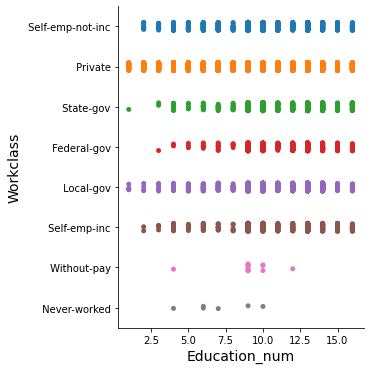

In [74]:
#visualize this column by Catplot
plt.figure(figsize=(150,7))
sns.catplot(x= 'Education_num',y= 'Workclass', data=df)
plt.ylabel('Workclass', fontsize = 14)
plt.xlabel('Education_num', fontsize = 14)

Text(0, 0.5, 'Education_num')

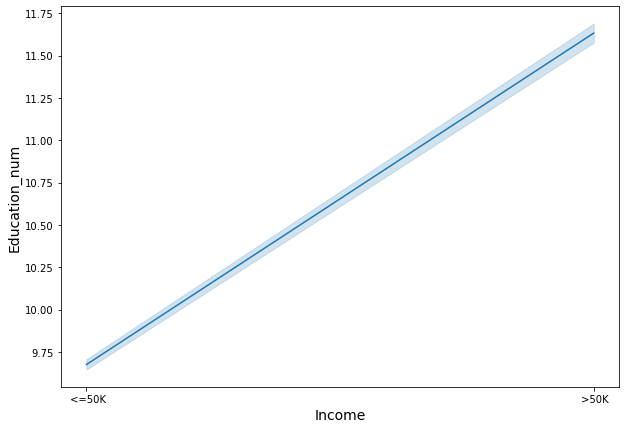

In [75]:
#visualize this column by lineplot
plt.figure(figsize=(10,7))
sns.lineplot(y= 'Education_num',x= 'Income', data=df)
plt.xlabel('Income', fontsize = 14)
plt.ylabel('Education_num', fontsize = 14)

Observation:
1. No zero values are found
2. No null values are found
3. No outliers are found
4. As the Age increases, Education numbers increases
5. we can see, in pink color, some peoples have good education numbers byt still they are working without pay.
6. there is a linear curve between Education Numbers and Income

In [76]:
#check the shape of our dataset
print('Actual shape of our Dataset now :-------->', df.shape)

Actual shape of our Dataset now :--------> (28642, 15)


# Column6: Marital_status

In [77]:
df['Marital_status'].unique()#check the unique values

array([' Married-civ-spouse', ' Divorced', ' Married-spouse-absent',
       ' Never-married', ' Separated', ' Widowed', ' Married-AF-spouse'],
      dtype=object)

In [78]:
df['Marital_status'].value_counts()#check the counts of the unique values

 Married-civ-spouse       13400
 Never-married             9228
 Divorced                  4033
 Separated                  899
 Widowed                    702
 Married-spouse-absent      362
 Married-AF-spouse           18
Name: Marital_status, dtype: int64

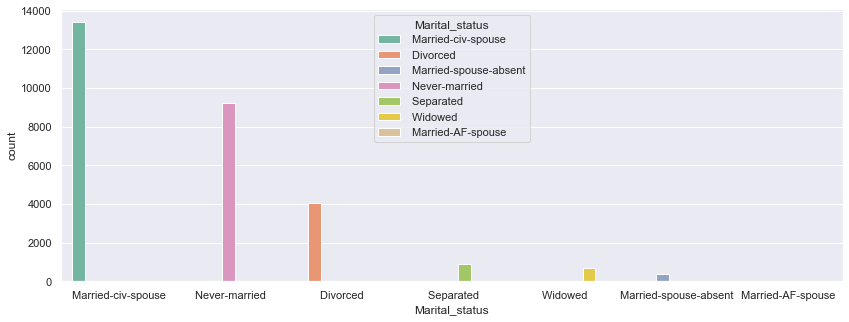

In [79]:
#plotting each class frequency
fig = plt.figure(figsize=(14,5))
sns.set_theme(style="darkgrid")
ax = sns.countplot(x="Marital_status",palette="Set2", data=df, hue = 'Marital_status', order = df["Marital_status"].value_counts().index)
plt.show()

In [80]:
df['Marital_status'].isnull().sum()#check the null values

0

Text(-92.16499999999999, 0.5, 'Marital_status')

<Figure size 720x504 with 0 Axes>

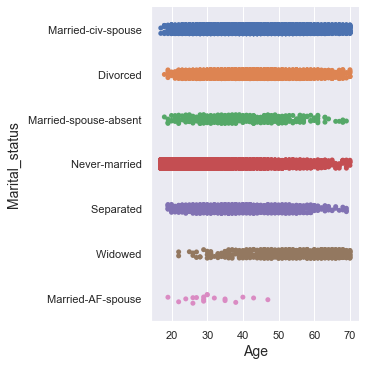

In [81]:
#visualize this column by catplot
plt.figure(figsize=(10,7))
sns.catplot(y= 'Marital_status',x= 'Age', data=df)
plt.xlabel('Age', fontsize = 14)
plt.ylabel('Marital_status', fontsize = 14)

Text(0, 0.5, 'Marital_status')

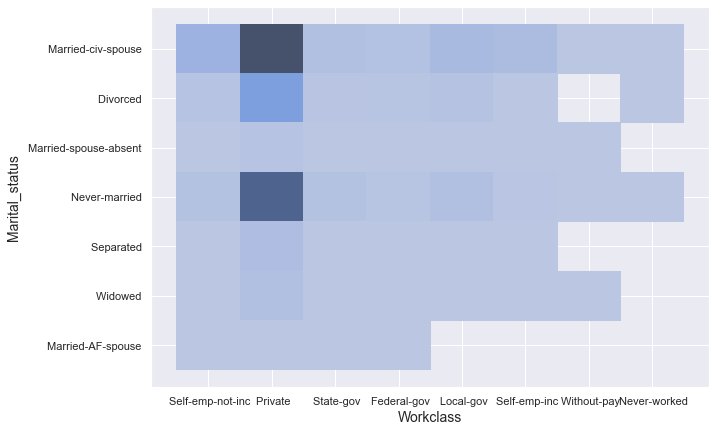

In [82]:
#visualize this column by histplot
plt.figure(figsize=(10,7))
sns.histplot(y= 'Marital_status',x= 'Workclass', data=df)
plt.xlabel('Workclass', fontsize = 14)
plt.ylabel('Marital_status', fontsize = 14)

Text(0, 0.5, 'Marital_status')

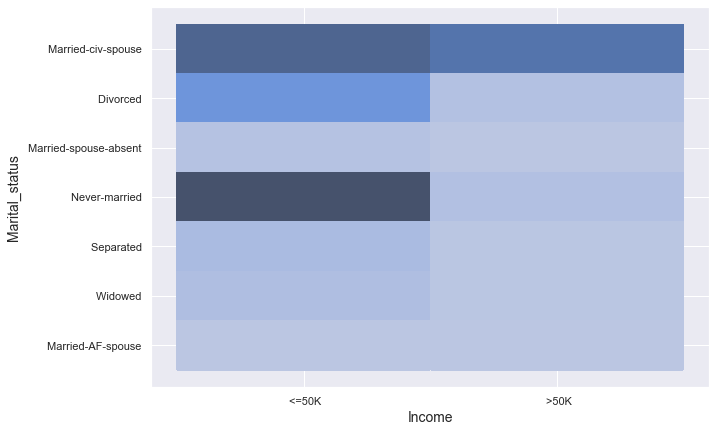

In [83]:
#visualize this column by histplot
plt.figure(figsize=(10,7))
sns.histplot(y= 'Marital_status',x= 'Income', data=df)
plt.xlabel('Income', fontsize = 14)
plt.ylabel('Marital_status', fontsize = 14)

In [84]:
df.groupby('Marital_status')['Income'].value_counts(normalize = True).sort_index(ascending=False).head(20)
#check the relationship between Marital_status and Income

Marital_status          Income
 Widowed                 >50K     0.096866
                         <=50K    0.903134
 Separated               >50K     0.068966
                         <=50K    0.931034
 Never-married           >50K     0.048331
                         <=50K    0.951669
 Married-spouse-absent   >50K     0.085635
                         <=50K    0.914365
 Married-civ-spouse      >50K     0.457687
                         <=50K    0.542313
 Married-AF-spouse       >50K     0.500000
                         <=50K    0.500000
 Divorced                >50K     0.108108
                         <=50K    0.891892
Name: Income, dtype: float64

Observation:
1. No null values are found
2. Married-civ-spouse are more in numbers than others
3. Married-civ-spouse and never married peoples are more in private sectors
4. Married-civ-spouse and never married peoples are less income than others
5. some Married-civ-spouse have high income because their quantity is high as compare to others.
6. 95% Never Married peoples have income less than 50k.
7. Equal range of Married-AF-spouse peoples are divided into income range.

In [85]:
#check the shape of our dataset
print('Actual shape of our Dataset now :-------->', df.shape)

Actual shape of our Dataset now :--------> (28642, 15)


# Column7: Occupation

In [86]:
df['Occupation'].unique()#check the unique values

array([' Exec-managerial', ' Handlers-cleaners', ' Prof-specialty',
       ' Other-service', ' Adm-clerical', ' Sales', ' Craft-repair',
       ' Transport-moving', ' Farming-fishing', ' Machine-op-inspct',
       ' Tech-support', ' Protective-serv', ' Armed-Forces',
       ' Priv-house-serv', ' ?'], dtype=object)

In [87]:
df['Occupation'].value_counts()#check the counts of the unique values

 Prof-specialty       3891
 Craft-repair         3818
 Exec-managerial      3812
 Adm-clerical         3514
 Sales                3391
 Other-service        3059
 Machine-op-inspct    1899
 Transport-moving     1499
 Handlers-cleaners    1248
 Farming-fishing       899
 Tech-support          870
 Protective-serv       602
 Priv-house-serv       125
 Armed-Forces            9
 ?                       6
Name: Occupation, dtype: int64

In [88]:
df['Occupation'].isnull().sum()#check the null values

0

In [89]:
df.drop(df[df['Occupation'] == ' ?'].index,inplace=True)

In [90]:
df['Occupation'].value_counts()#check the counts of the unique values

 Prof-specialty       3891
 Craft-repair         3818
 Exec-managerial      3812
 Adm-clerical         3514
 Sales                3391
 Other-service        3059
 Machine-op-inspct    1899
 Transport-moving     1499
 Handlers-cleaners    1248
 Farming-fishing       899
 Tech-support          870
 Protective-serv       602
 Priv-house-serv       125
 Armed-Forces            9
Name: Occupation, dtype: int64

In [91]:
df['Occupation'].value_counts(normalize = True)#check the counts of the unique values

 Prof-specialty       0.135878
 Craft-repair         0.133329
 Exec-managerial      0.133119
 Adm-clerical         0.122713
 Sales                0.118417
 Other-service        0.106824
 Machine-op-inspct    0.066315
 Transport-moving     0.052347
 Handlers-cleaners    0.043582
 Farming-fishing      0.031394
 Tech-support         0.030381
 Protective-serv      0.021022
 Priv-house-serv      0.004365
 Armed-Forces         0.000314
Name: Occupation, dtype: float64

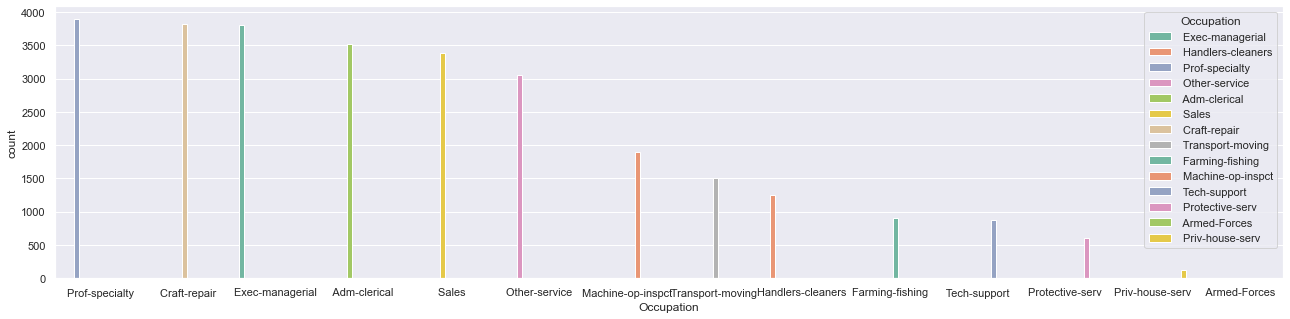

In [92]:
#plotting each class frequency
fig = plt.figure(figsize=(22,5))
sns.set_theme(style="darkgrid")
ax = sns.countplot(x="Occupation",palette="Set2", data=df, hue = 'Occupation', order = df["Occupation"].value_counts().index)
plt.show()

In [93]:
df.groupby('Age')['Occupation'].value_counts(normalize = True).sort_index(ascending=True).head(50)
#Checking the relationship between Occupation and Age

Age  Occupation        
17    Adm-clerical         0.068750
      Craft-repair         0.043750
      Exec-managerial      0.003125
      Farming-fishing      0.028125
      Handlers-cleaners    0.118750
      Machine-op-inspct    0.006250
      Other-service        0.393750
      Priv-house-serv      0.025000
      Prof-specialty       0.031250
      Protective-serv      0.009375
      Sales                0.259375
      Tech-support         0.003125
      Transport-moving     0.009375
18    Adm-clerical         0.115663
      Craft-repair         0.038554
      Exec-managerial      0.012048
      Farming-fishing      0.031325
      Handlers-cleaners    0.108434
      Machine-op-inspct    0.033735
      Other-service        0.354217
      Priv-house-serv      0.007229
      Prof-specialty       0.016867
      Protective-serv      0.012048
      Sales                0.248193
      Tech-support         0.004819
      Transport-moving     0.016867
19    Adm-clerical         0.165441
    

Text(0, 0.5, 'Occupation')

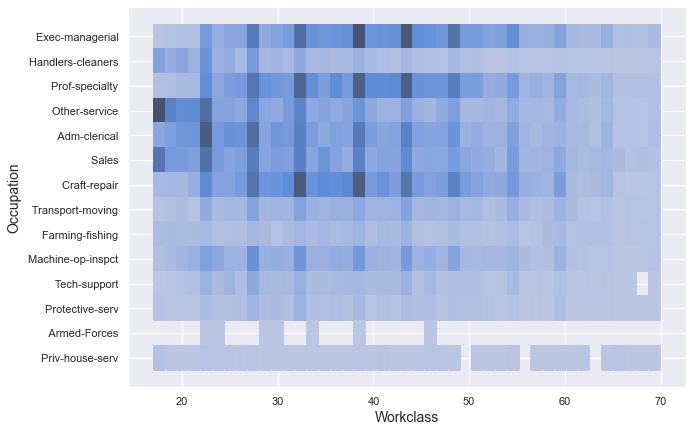

In [94]:
#visualize this column by Histplot
plt.figure(figsize=(10,7))
sns.histplot(y= 'Occupation',x= 'Age', data=df)
plt.xlabel('Workclass', fontsize = 14)
plt.ylabel('Occupation', fontsize = 14)

In [95]:
df.groupby('Occupation')['Workclass'].value_counts(normalize = True).sort_index(ascending=True).head(50)
#Checking the relationship between Occupation and Workclass

Occupation          Workclass        
 Adm-clerical        Federal-gov         0.082812
                     Local-gov           0.072851
                     Private             0.755834
                     Self-emp-inc        0.007684
                     Self-emp-not-inc    0.012521
                     State-gov           0.067445
                     Without-pay         0.000854
 Armed-Forces        Federal-gov         1.000000
 Craft-repair        Federal-gov         0.015191
                     Local-gov           0.036406
                     Private             0.778942
                     Self-emp-inc        0.026454
                     Self-emp-not-inc    0.129125
                     State-gov           0.013620
                     Without-pay         0.000262
 Exec-managerial     Federal-gov         0.042497
                     Local-gov           0.050892
                     Private             0.667629
                     Self-emp-inc        0.097324
            

Text(0, 0.5, 'Occupation')

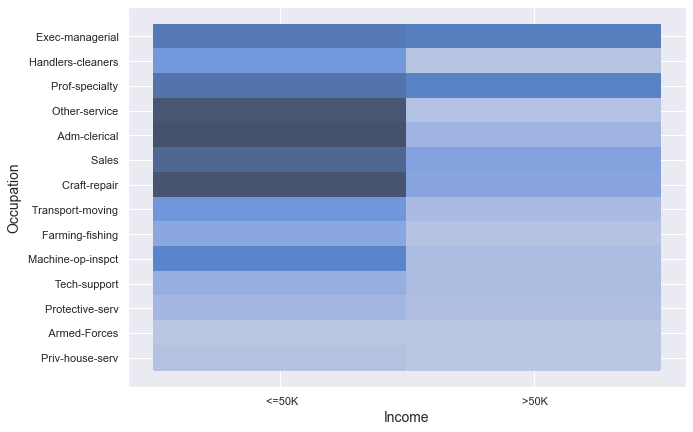

In [96]:
#visualize this column by histplot
plt.figure(figsize=(10,7))
sns.histplot(y= 'Occupation',x= 'Income', data=df)
plt.xlabel('Income', fontsize = 14)
plt.ylabel('Occupation', fontsize = 14)

In [97]:
df.groupby('Occupation')['Income'].value_counts(normalize = True).sort_index(ascending=True).head(50)
#Checking the relationship between Occupation and Income

Occupation          Income
 Adm-clerical        <=50K    0.865111
                     >50K     0.134889
 Armed-Forces        <=50K    0.888889
                     >50K     0.111111
 Craft-repair        <=50K    0.774489
                     >50K     0.225511
 Exec-managerial     <=50K    0.511805
                     >50K     0.488195
 Farming-fishing     <=50K    0.879867
                     >50K     0.120133
 Handlers-cleaners   <=50K    0.934295
                     >50K     0.065705
 Machine-op-inspct   <=50K    0.873618
                     >50K     0.126382
 Other-service       <=50K    0.957176
                     >50K     0.042824
 Priv-house-serv     <=50K    0.992000
                     >50K     0.008000
 Prof-specialty      <=50K    0.550758
                     >50K     0.449242
 Protective-serv     <=50K    0.669435
                     >50K     0.330565
 Sales               <=50K    0.729873
                     >50K     0.270127
 Tech-support        <=50K    0.69540

Observation:
1. No null values are found
2. We drop this '?' values
3. peoples are more in 'Prof-specialty' than others
4. Peoples are more in 'Other services' at the age of 17
5. In each and every occupation, private sector peoples are more
6. We can see, in each and every occupation, more number of peoples income is less than 50k.

In [98]:
#check the shape of our dataset
print('Actual shape of our Dataset now :-------->', df.shape)

Actual shape of our Dataset now :--------> (28636, 15)


# Column8: Relationship

In [99]:
df['Relationship'].unique()#check the unique values

array([' Husband', ' Not-in-family', ' Wife', ' Own-child', ' Unmarried',
       ' Other-relative'], dtype=object)

In [100]:
df['Relationship'].value_counts()#check the counts of the unique values

 Husband           11871
 Not-in-family      7274
 Own-child          4252
 Unmarried          3058
 Wife               1348
 Other-relative      833
Name: Relationship, dtype: int64

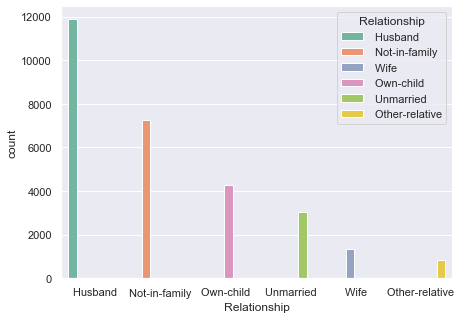

In [101]:
#plotting each class frequency
fig = plt.figure(figsize=(7,5))
sns.set_theme(style="darkgrid")
ax = sns.countplot(x="Relationship",palette="Set2", data=df, hue = 'Relationship', order = df["Relationship"].value_counts().index)
plt.show()

In [102]:
df['Relationship'].value_counts(normalize = True)#check the counts of the unique values

 Husband           0.414548
 Not-in-family     0.254016
 Own-child         0.148484
 Unmarried         0.106789
 Wife              0.047074
 Other-relative    0.029089
Name: Relationship, dtype: float64

In [103]:
df['Relationship'].isnull().sum()#check the null values

0

Text(0, 0.5, 'Relationship')

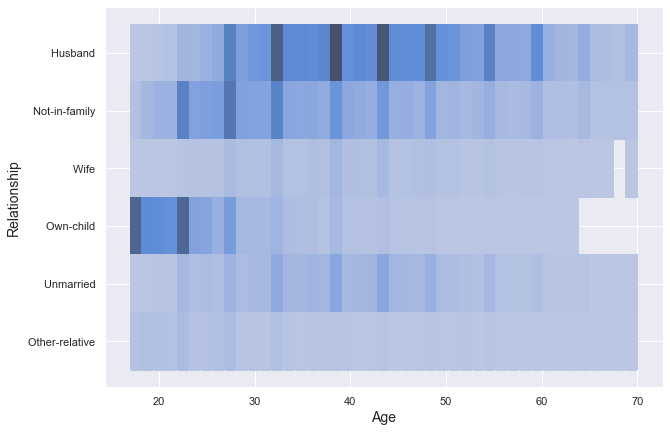

In [104]:
#visualize this column by histplot
plt.figure(figsize=(10,7))
sns.histplot(y= 'Relationship',x= 'Age', data=df)
plt.xlabel('Age', fontsize = 14)
plt.ylabel('Relationship', fontsize = 14)

Text(0, 0.5, 'Relationship')

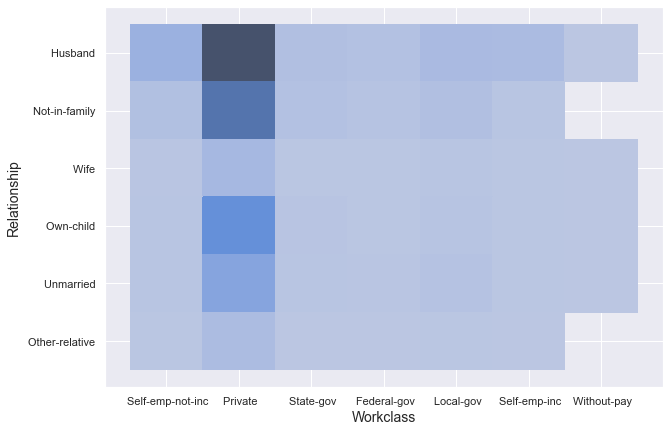

In [105]:
#visualize this column by histplot
plt.figure(figsize=(10,7))
sns.histplot(y= 'Relationship',x= 'Workclass', data=df)
plt.xlabel('Workclass', fontsize = 14)
plt.ylabel('Relationship', fontsize = 14)

Text(0, 0.5, 'Relationship')

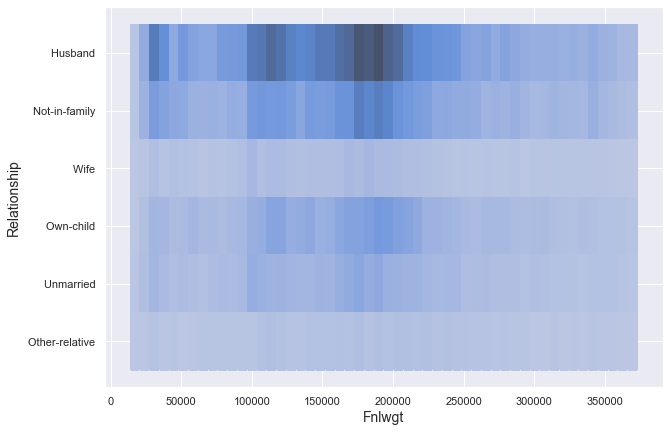

In [106]:
#visualize this column by histplot
plt.figure(figsize=(10,7))
sns.histplot(y= 'Relationship',x= 'Fnlwgt', data=df)
plt.xlabel('Fnlwgt', fontsize = 14)
plt.ylabel('Relationship', fontsize = 14)

Text(0, 0.5, 'Relationship')

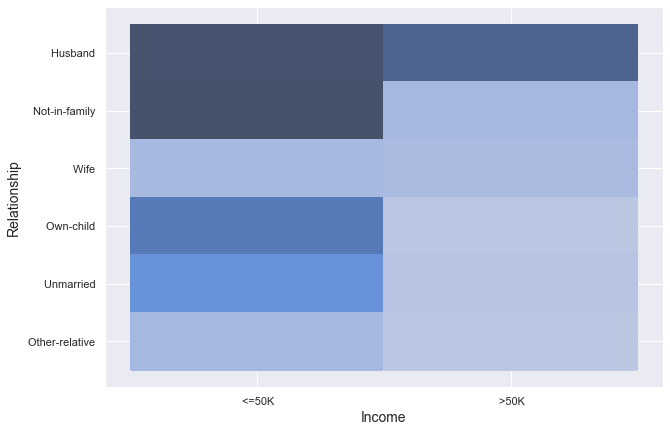

In [107]:
#visualize this column by histplot
plt.figure(figsize=(10,7))
sns.histplot(y= 'Relationship',x= 'Income', data=df)
plt.xlabel('Income', fontsize = 14)
plt.ylabel('Relationship', fontsize = 14)

Observation:
1. No null values are found
2. In Relationship have many categories, out of which 'Husband' category has approx 41% 
3. At age around 35-45, husband quantity is more than others
4. and 'own child' is also more at the age around 20
5. mostly the population of husband are in private sectors
6. husbands are more at final weight around 2,00,000
7. More peoples of 'Husband' and 'not-in-family' category have less income than others

In [108]:
#check the shape of our dataset
print('Actual shape of our Dataset now :-------->', df.shape)

Actual shape of our Dataset now :--------> (28636, 15)


# Column9: Race

In [109]:
df['Race'].unique()#check the unique values

array([' White', ' Black', ' Asian-Pac-Islander', ' Amer-Indian-Eskimo',
       ' Other'], dtype=object)

In [110]:
df['Race'].value_counts()#check the counts of the unique values

 White                 24598
 Black                  2572
 Asian-Pac-Islander      951
 Amer-Indian-Eskimo      283
 Other                   232
Name: Race, dtype: int64

In [111]:
df['Race'].isnull().sum() #check the null values

0

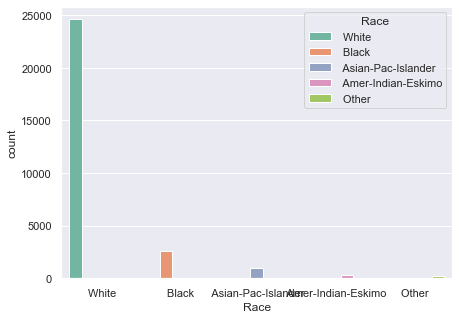

In [112]:
#plotting each class frequency
fig = plt.figure(figsize=(7,5))
sns.set_theme(style="darkgrid")
ax = sns.countplot(x="Race",palette="Set2", data=df, hue = 'Race', order = df["Race"].value_counts().index)
plt.show()

In [113]:
df['Race'].value_counts(normalize = True)#check the counts of the unique values

 White                 0.858989
 Black                 0.089817
 Asian-Pac-Islander    0.033210
 Amer-Indian-Eskimo    0.009883
 Other                 0.008102
Name: Race, dtype: float64

In [114]:
df['Race'].isnull().sum()#check the null values

0

Text(-78.03999999999999, 0.5, 'Race')

<Figure size 720x504 with 0 Axes>

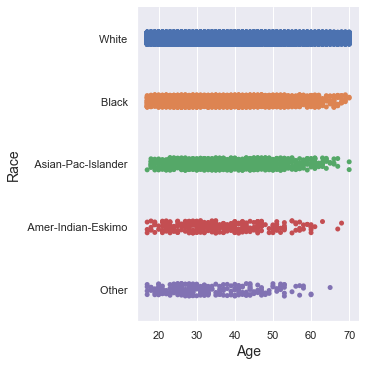

In [115]:
#visualize this column by catplot
plt.figure(figsize=(10,7))
sns.catplot(y= 'Race',x= 'Age', data=df)
plt.xlabel('Age', fontsize = 14)
plt.ylabel('Race', fontsize = 14)

Text(0, 0.5, 'Race')

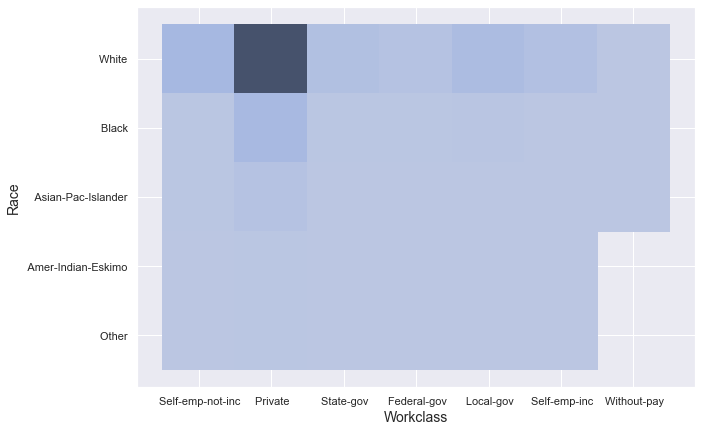

In [116]:
#visualize this column by histplot
plt.figure(figsize=(10,7))
sns.histplot(y= 'Race',x= 'Workclass', data=df)
plt.xlabel('Workclass', fontsize = 14)
plt.ylabel('Race', fontsize = 14)

In [117]:
df.groupby('Race')['Workclass'].value_counts(normalize = True).sort_index(ascending=True).head(50)
#Checking the relationship between Race and workclass

Race                 Workclass        
 Amer-Indian-Eskimo   Federal-gov         0.067138
                      Local-gov           0.123675
                      Private             0.667845
                      Self-emp-inc        0.007067
                      Self-emp-not-inc    0.081272
                      State-gov           0.053004
 Asian-Pac-Islander   Federal-gov         0.046267
                      Local-gov           0.039958
                      Private             0.735016
                      Self-emp-inc        0.047319
                      Self-emp-not-inc    0.074658
                      State-gov           0.055731
                      Without-pay         0.001052
 Black                Federal-gov         0.057154
                      Local-gov           0.103421
                      Private             0.744946
                      Self-emp-inc        0.007387
                      Self-emp-not-inc    0.032271
                      State-gov           0

Text(0, 0.5, 'Race')

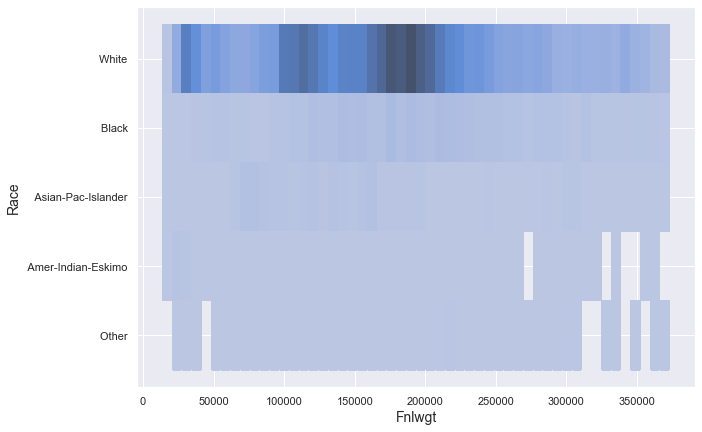

In [118]:
#visualize this column by histplot
plt.figure(figsize=(10,7))
sns.histplot(y= 'Race',x= 'Fnlwgt', data=df)
plt.xlabel('Fnlwgt', fontsize = 14)
plt.ylabel('Race', fontsize = 14)

In [119]:
df.groupby('Race')['Income'].value_counts(normalize = True).sort_index(ascending=True).head(50)
#Checking the relationship between Race and Income

Race                 Income
 Amer-Indian-Eskimo   <=50K    0.879859
                      >50K     0.120141
 Asian-Pac-Islander   <=50K    0.720294
                      >50K     0.279706
 Black                <=50K    0.873639
                      >50K     0.126361
 Other                <=50K    0.909483
                      >50K     0.090517
 White                <=50K    0.734165
                      >50K     0.265835
Name: Income, dtype: float64

Observation:
1. No nmull values are found
2. 'White' peoples are more around 85%
3. 'Amer-Indian-Eskimo' are very less 0.09% only and approx all are young around 20-40 age
4. 'White' peoples are more in private scetors
5. 'Amer-Indian-Eskimo' are 66% in private sectors
6. final weight of white peoples around 2,00,000
7. mostly peoples have less income 

In [120]:
#check the shape of our dataset
print('Actual shape of our Dataset now :-------->', df.shape)

Actual shape of our Dataset now :--------> (28636, 15)


# Column10: Sex

In [121]:
df['Sex'].unique()#check the unique values

array([' Male', ' Female'], dtype=object)

In [122]:
df['Sex'].value_counts()#check the counts of the unique values

 Male      19296
 Female     9340
Name: Sex, dtype: int64

In [123]:
df['Sex'].value_counts(normalize = True)#check the counts of the unique values

 Male      0.673837
 Female    0.326163
Name: Sex, dtype: float64

In [124]:
df['Sex'].isnull().sum()#check the null values

0

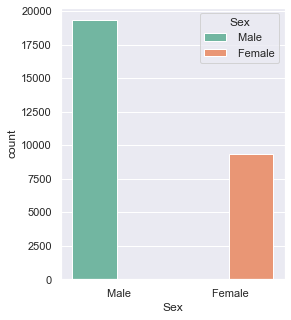

In [125]:
#plotting each class frequency
fig = plt.figure(figsize=(4,5))
sns.set_theme(style="darkgrid")
ax = sns.countplot(x="Sex",palette="Set2", data=df, hue = 'Sex', order = df["Sex"].value_counts().index)
plt.show()

In [126]:
df.groupby('Age')['Sex'].value_counts(normalize = True).sort_index(ascending=True).head(50)
#Checking the relationship between Sex and Age

Age  Sex    
17    Female    0.456250
      Male      0.543750
18    Female    0.489157
      Male      0.510843
19    Female    0.503676
      Male      0.496324
20    Female    0.472881
      Male      0.527119
21    Female    0.445378
      Male      0.554622
22    Female    0.451817
      Male      0.548183
23    Female    0.422311
      Male      0.577689
24    Female    0.390244
      Male      0.609756
25    Female    0.376502
      Male      0.623498
26    Female    0.363384
      Male      0.636616
27    Female    0.356091
      Male      0.643909
28    Female    0.351245
      Male      0.648755
29    Female    0.330163
      Male      0.669837
30    Female    0.314103
      Male      0.685897
31    Female    0.315985
      Male      0.684015
32    Female    0.302264
      Male      0.697736
33    Female    0.275253
      Male      0.724747
34    Female    0.291718
      Male      0.708282
35    Female    0.265997
      Male      0.734003
36    Female    0.306569
      Male  

Text(0, 0.5, 'Sex')

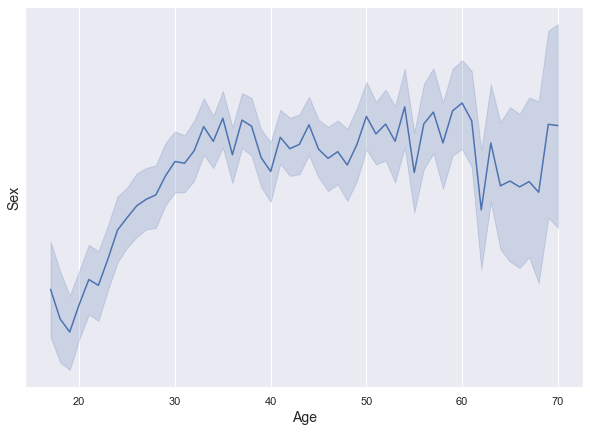

In [127]:
#visualize this column by lineplot
plt.figure(figsize=(10,7))
sns.lineplot(y= 'Sex',x= 'Age', data=df)
plt.xlabel('Age', fontsize = 14)
plt.ylabel('Sex', fontsize = 14)

In [128]:
df.groupby('Workclass')['Sex'].value_counts(normalize = True).sort_index(ascending=True).head(50)
#Checking the relationship between Sex and Workclass

Workclass          Sex    
 Federal-gov        Female    0.322763
                    Male      0.677237
 Local-gov          Female    0.401013
                    Male      0.598987
 Private            Female    0.344989
                    Male      0.655011
 Self-emp-inc       Female    0.120192
                    Male      0.879808
 Self-emp-not-inc   Female    0.159915
                    Male      0.840085
 State-gov          Female    0.375514
                    Male      0.624486
 Without-pay        Female    0.384615
                    Male      0.615385
Name: Sex, dtype: float64

Text(0, 0.5, 'Sex')

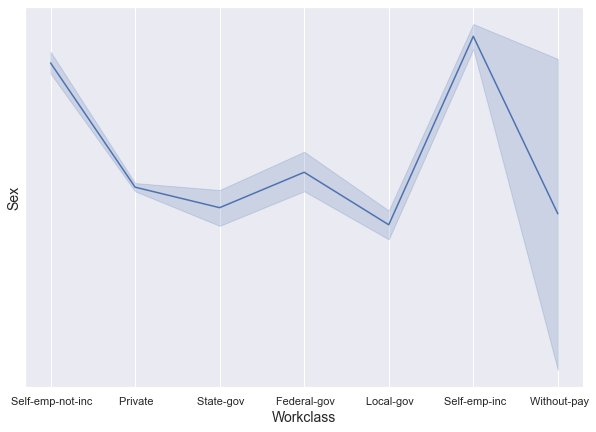

In [129]:
#visualize this column by lineplot
plt.figure(figsize=(10,7))
sns.lineplot(y= 'Sex',x= 'Workclass', data=df)
plt.xlabel('Workclass', fontsize = 14)
plt.ylabel('Sex', fontsize = 14)

Text(0, 0.5, 'Sex')

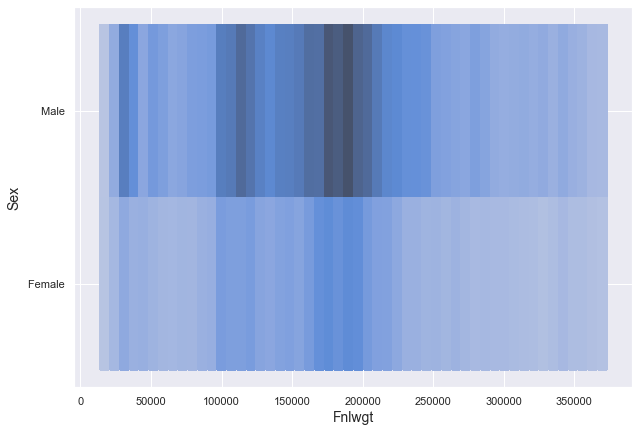

In [130]:
#visualize this column by histplot
plt.figure(figsize=(10,7))
sns.histplot(y= 'Sex',x= 'Fnlwgt', data=df)
plt.xlabel('Fnlwgt', fontsize = 14)
plt.ylabel('Sex', fontsize = 14)

Text(0, 0.5, 'Sex')

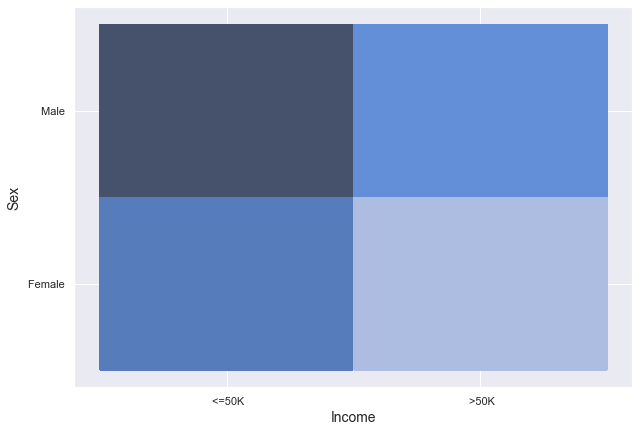

In [131]:
#visualize this column by histplot
plt.figure(figsize=(10,7))
sns.histplot(y= 'Sex',x= 'Income', data=df)
plt.xlabel('Income', fontsize = 14)
plt.ylabel('Sex', fontsize = 14)

In [132]:
df.groupby('Income')['Sex'].value_counts(normalize = True).sort_index(ascending=True).head(50)
#Checking the relationship between Sex and Income

Income  Sex    
 <=50K   Female    0.385856
         Male      0.614144
 >50K    Female    0.147947
         Male      0.852053
Name: Sex, dtype: float64

Observation:
1. No null values are found
2. Males are more than Females
3. As Age increases, the population of males are more than females
4. population males are more in 'Self-emp-inc' this category.
5. final weight of males are around 100000 to 200000
6. mostly males have less income but in terms of percentage, males have high income 

In [133]:
#check the shape of our dataset
print('Actual shape of our Dataset now :-------->', df.shape)

Actual shape of our Dataset now :--------> (28636, 15)


# Column11: Capital_gain

In [134]:
df['Capital_gain'].unique()#check the unique values

array([    0, 14084,  5178,  5013,  2407, 14344, 15024,  7688,  4386,
        7298,  1409,  4064,  1055,  2050,  2176,  2174,   594, 20051,
        6849,  8614,  3411,  2597, 25236,  4650,  9386,  2463,  3103,
        4101,  3325,  2580,  3471,  4865, 10605, 99999,  6514,  1471,
        3674,  2105,  2885, 10520,  2202,  2961, 27828,  1506, 13550,
        2635,  5556,  6767,  4787,  3137,  3818,   914,  2829,  2977,
        4934,  2354,  3464,  5455, 15020,  1424,  3273, 22040, 10566,
        7430, 34095,  6497,  3908,   114,  7896,  2346,  4416,  2228,
        2907,  1151,  2414,  2290,  3418, 41310,  4508,  2538,  3781,
        3456,  1848,  3887,  5721,  9562,  6418,  2329,  2036,  3942,
        1831,  2964, 11678,  2936,  2993,  7443, 15831,  4687,  1797,
        2009,  3432,  1639,  2653,  2062, 18481,  6360,  7978, 25124,
         991,  2387,  6723,  5060,  1086], dtype=int64)

In [135]:
df['Capital_gain'].value_counts()#check the counts of the unique values

0        26229
15024      325
7688       268
7298       234
99999      141
         ...  
2050         1
22040        1
2387         1
3456         1
25124        1
Name: Capital_gain, Length: 113, dtype: int64

In [136]:
df['Capital_gain'].isnull().sum()#check the null values

0

In [137]:
df['Capital_gain'].all() #check the zeros

False

In [138]:
df['Capital_gain'] = df['Capital_gain'].replace(0.0, df['Capital_gain'].mean())

In [139]:
df['Capital_gain'].all() #check the zeros

True

In [140]:
df['Capital_gain'].skew() #check the skewness

12.209032709579633

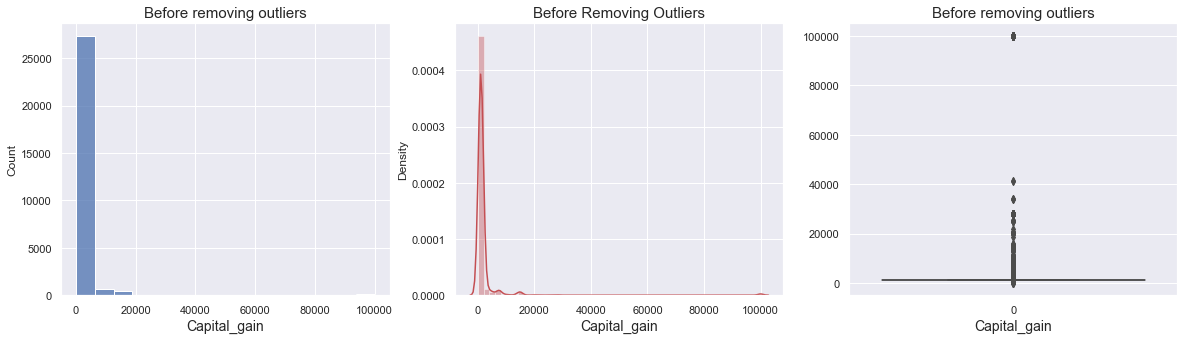

In [141]:
#Visualization
plt.figure(figsize=(20,5))
plt.subplot(1,3,1)
sns.histplot(df['Capital_gain']) #visualize the outliers by using histplot
plt.title('Before removing outliers', fontsize=15)
plt.xlabel('Capital_gain', fontsize= 14)

plt.subplot(1,3,2)
sns.distplot(df['Capital_gain'], color='r') #visualize the normalization curve by using distplot
plt.title('Before Removing Outliers', fontsize=15)
plt.xlabel('Capital_gain', fontsize= 14)

plt.subplot(1,3,3)
sns.boxplot(data = df['Capital_gain']) #visualize the outliers by using boxplot
plt.title('Before removing outliers', fontsize=15)
plt.xlabel('Capital_gain', fontsize= 14)
plt.show()

In [142]:
df.drop(columns = ['Capital_gain'], inplace = True) #Drop the column

Observation:
1. no null values are found
2. zero values are found and replace by mean value of the column
3. Too many outliers, so, we have to drop this column

In [143]:
#check the shape of our dataset
print('Actual shape of our Dataset now :-------->', df.shape)

Actual shape of our Dataset now :--------> (28636, 14)


# Column12: Capital_loss

In [144]:
df['Capital_loss'].unique()#check the unique values

array([   0, 2042, 1902, 1573, 1887, 1719, 1762, 1564, 2179, 1980, 1977,
       1340, 1741, 1485, 2339, 2415, 1408, 1380, 1721, 2051, 2377, 1669,
       2352, 1672,  653, 2392, 1504, 1590, 1651, 1876, 1628, 1848, 2001,
       2002, 1579, 1740, 2258, 1602, 2547, 2206, 1726, 2444, 1138, 2238,
        625,  213,  880, 1668, 1092, 1594, 3004, 2231, 1844,  810, 2824,
       2559, 2057, 2205, 1974,  974, 2174, 2149, 1258, 2129, 2603, 2282,
        323, 2246, 1617, 1648, 1825, 3770, 1755, 2267, 2080,  419,  155,
       3900, 2201, 2754, 2472, 1411], dtype=int64)

In [145]:
df['Capital_loss'].value_counts()#check the counts of the unique values

0       27265
1902      188
1977      161
1887      149
1848       48
        ...  
1648        1
419         1
1411        1
1844        1
2201        1
Name: Capital_loss, Length: 82, dtype: int64

In [146]:
df['Capital_loss'].isnull().sum()#check the null values

0

In [147]:
df['Capital_loss'].all() #check the zeros

False

In [148]:
df['Capital_loss'] = df['Capital_loss'].replace(0.0, df['Capital_loss'].mean())

In [149]:
df['Capital_loss'].all() #check the zeros

True

In [150]:
df['Capital_loss'].skew() #check the skewness

4.496451200900209

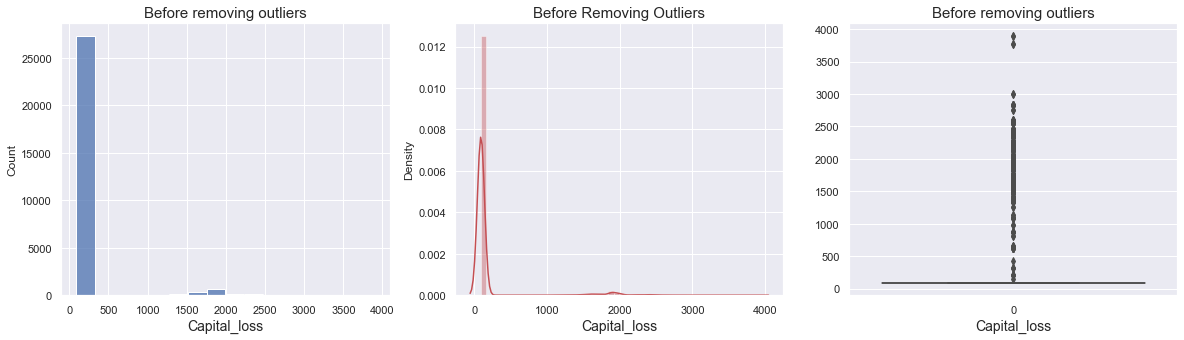

In [151]:
#Visualization
plt.figure(figsize=(20,5))
plt.subplot(1,3,1)
sns.histplot(df['Capital_loss']) #visualize the outliers by using histplot
plt.title('Before removing outliers', fontsize=15)
plt.xlabel('Capital_loss', fontsize= 14)

plt.subplot(1,3,2)
sns.distplot(df['Capital_loss'], color='r') #visualize the normalization curve by using distplot
plt.title('Before Removing Outliers', fontsize=15)
plt.xlabel('Capital_loss', fontsize= 14)

plt.subplot(1,3,3)
sns.boxplot(data = df['Capital_loss']) #visualize the outliers by using boxplot
plt.title('Before removing outliers', fontsize=15)
plt.xlabel('Capital_loss', fontsize= 14)
plt.show()

In [152]:
df.drop(columns = ['Capital_loss'], inplace = True) #Drop the column

Observation:
1. no null values are found
2. zero values are found and replace by mean value of the column
3. Too many outliers, so, we have to drop this column

In [153]:
#check the shape of our dataset
print('Actual shape of our Dataset now :-------->', df.shape)

Actual shape of our Dataset now :--------> (28636, 13)


# Column13: Hours_per_week

In [154]:
df['Hours_per_week'].unique()#check the unique values

array([13, 40, 16, 45, 50, 80, 30, 35, 60, 20, 52, 44, 15, 38, 43, 55, 48,
       58, 32, 70, 22, 25, 56, 41, 28, 36, 24, 46, 42, 12, 65,  1, 34, 75,
       98, 33, 54, 10,  6, 64, 18, 72,  8, 47, 37, 21, 26, 14,  5, 59,  7,
       99, 53, 62, 57, 78, 90, 66, 11,  9, 39, 49, 84,  4, 17, 68,  3, 27,
       85, 31, 51, 77, 63, 23, 87, 88, 73, 89, 97, 19, 94, 29, 96, 67, 82,
        2, 86, 91, 81, 76, 92, 61, 95], dtype=int64)

In [155]:
df['Hours_per_week'].value_counts()#check the counts of the unique values

40    13570
50     2599
45     1698
60     1367
35     1119
      ...  
95        2
82        1
94        1
92        1
87        1
Name: Hours_per_week, Length: 93, dtype: int64

In [156]:
df['Hours_per_week'].value_counts(normalize=True)#check the counts of the unique values

40    0.473879
50    0.090760
45    0.059296
60    0.047737
35    0.039077
        ...   
95    0.000070
82    0.000035
94    0.000035
92    0.000035
87    0.000035
Name: Hours_per_week, Length: 93, dtype: float64

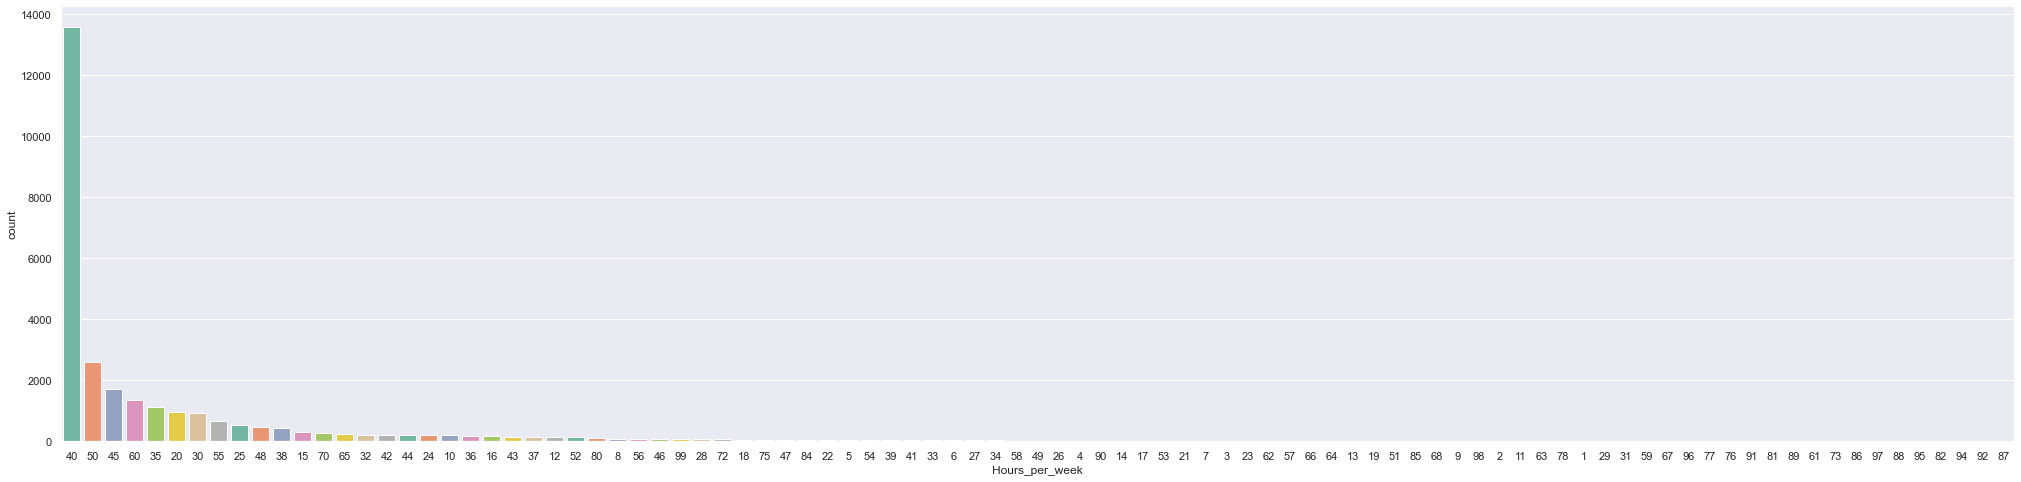

In [157]:
#plotting each class frequency
fig = plt.figure(figsize=(35,8))
sns.set_theme(style="darkgrid")
ax = sns.countplot(x="Hours_per_week",palette="Set2", data=df, order = df["Hours_per_week"].value_counts().index)
plt.show()

In [158]:
df['Hours_per_week'].isnull().sum()#check the null values

0

In [159]:
df['Hours_per_week'].all() #check the zeros

True

In [160]:
df['Hours_per_week'].skew() #check the skewness

0.36600585691820153

In [161]:
# Calculate mean, median, mode and std to check the normalization curve
print('Mean of the column:----->',df['Hours_per_week'].mean())
print('Median of the column:----->',df['Hours_per_week'].median())
print('Mode of the column:----->',st.mode(df['Hours_per_week']))
print('std of the column:----->',df['Hours_per_week'].std())

Mean of the column:-----> 41.13496996787261
Median of the column:-----> 40.0
Mode of the column:-----> 40
std of the column:-----> 11.868447385447848


Text(0, 0.5, 'Hours_per_week')

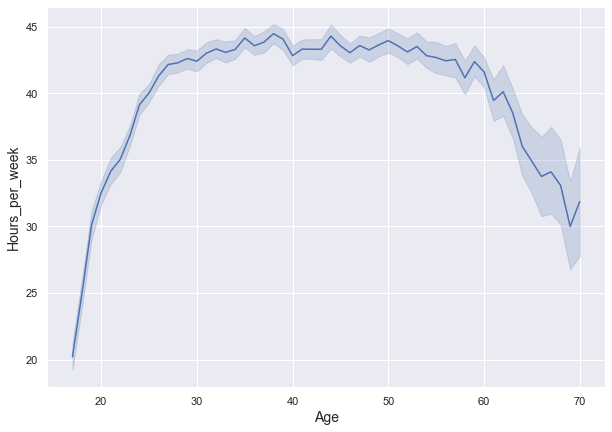

In [162]:
#visualize this column by lineplot
plt.figure(figsize=(10,7))
sns.lineplot(y= 'Hours_per_week',x= 'Age', data=df)
plt.xlabel('Age', fontsize = 14)
plt.ylabel('Hours_per_week', fontsize = 14)

Text(0, 0.5, 'Hours_per_week')

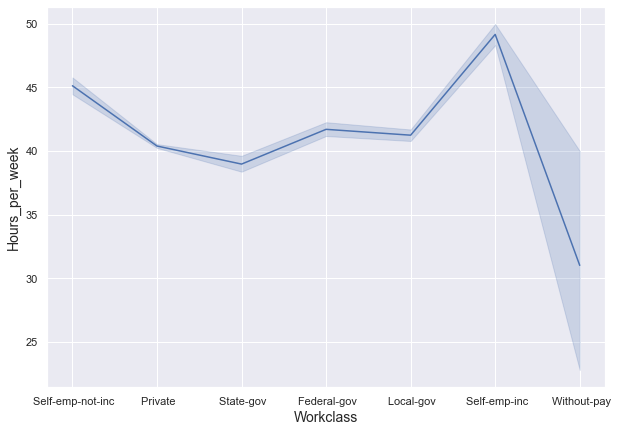

In [163]:
#visualize this column by lineplot
plt.figure(figsize=(10,7))
sns.lineplot(y= 'Hours_per_week',x= 'Workclass', data=df)
plt.xlabel('Workclass', fontsize = 14)
plt.ylabel('Hours_per_week', fontsize = 14)

Text(0, 0.5, 'Hours_per_week')

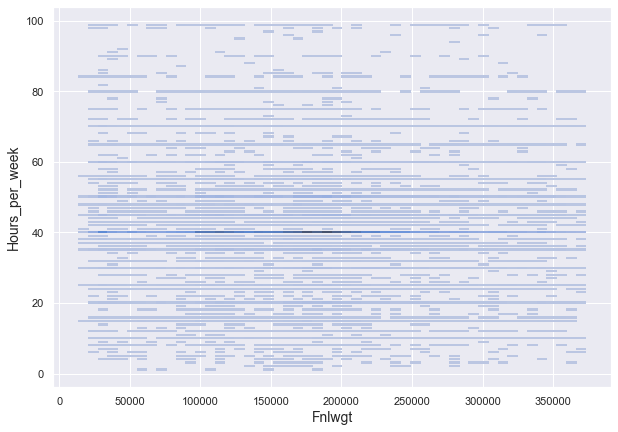

In [164]:
#visualize this column by histplot
plt.figure(figsize=(10,7))
sns.histplot(y= 'Hours_per_week',x= 'Fnlwgt', data=df)
plt.xlabel('Fnlwgt', fontsize = 14)
plt.ylabel('Hours_per_week', fontsize = 14)

Text(0, 0.5, 'Hours_per_week')

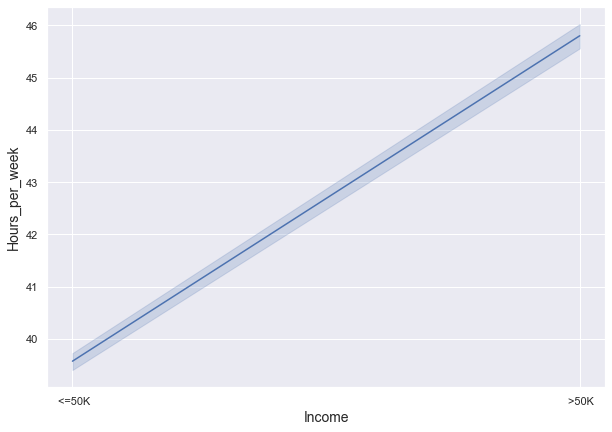

In [165]:
#visualize this column by lineplot
plt.figure(figsize=(10,7))
sns.lineplot(y= 'Hours_per_week',x= 'Income', data=df)
plt.xlabel('Income', fontsize = 14)
plt.ylabel('Hours_per_week', fontsize = 14)

Observation:
1. No null values are found
2. No zero values are found
3. Skewness is low 0.36
4. mean, median, mode values are good
5. As the Age increases, Hours per Week increases and After Age 60, it is decreasing
6. Federal Govt has high hours per week than private sector
7. 'Final weight' of 40 hours per week is approx 200000
8. We see linear curve between hours per week and income

In [166]:
#check the shape of our dataset
print('Actual shape of our Dataset now :-------->', df.shape)

Actual shape of our Dataset now :--------> (28636, 13)


# Column14: Native_country

In [167]:
df['Native_country'].unique()#check the unique values

array([' United-States', ' Cuba', ' Jamaica', ' India', ' ?', ' Mexico',
       ' Puerto-Rico', ' Honduras', ' England', ' Canada', ' Germany',
       ' Iran', ' Philippines', ' Poland', ' Cambodia', ' Thailand',
       ' Ecuador', ' Laos', ' Taiwan', ' Haiti', ' Portugal',
       ' Dominican-Republic', ' France', ' El-Salvador', ' Guatemala',
       ' Italy', ' China', ' South', ' Japan', ' Yugoslavia', ' Peru',
       ' Outlying-US(Guam-USVI-etc)', ' Scotland', ' Trinadad&Tobago',
       ' Greece', ' Nicaragua', ' Vietnam', ' Hong', ' Columbia',
       ' Ireland', ' Hungary', ' Holand-Netherlands'], dtype=object)

In [168]:
df['Native_country'].value_counts()#check the counts of the unique values

 United-States                 25723
 ?                               525
 Mexico                          461
 Philippines                     183
 Germany                         120
 Puerto-Rico                     104
 India                           100
 Canada                           99
 Cuba                             87
 El-Salvador                      83
 England                          79
 Jamaica                          78
 South                            69
 China                            67
 Dominican-Republic               66
 Italy                            65
 Vietnam                          62
 Japan                            55
 Poland                           52
 Columbia                         51
 Guatemala                        48
 Haiti                            42
 Taiwan                           41
 Iran                             40
 Portugal                         34
 Greece                           29
 Ecuador                          26
 

In [169]:
df.drop(df[df['Native_country'] == ' ?'].index,inplace=True) # drop this '?' value 

In [170]:
df['Native_country'].value_counts()#check the counts of the unique values

 United-States                 25723
 Mexico                          461
 Philippines                     183
 Germany                         120
 Puerto-Rico                     104
 India                           100
 Canada                           99
 Cuba                             87
 El-Salvador                      83
 England                          79
 Jamaica                          78
 South                            69
 China                            67
 Dominican-Republic               66
 Italy                            65
 Vietnam                          62
 Japan                            55
 Poland                           52
 Columbia                         51
 Guatemala                        48
 Haiti                            42
 Taiwan                           41
 Iran                             40
 Portugal                         34
 Greece                           29
 Ecuador                          26
 Nicaragua                        26
 

In [171]:
df['Native_country'].isnull().sum()#check the null values

0

In [172]:
df.groupby('Native_country')['Income'].value_counts(normalize = True).sort_index(ascending=True).head(50)
#Checking the relationship between Native_Country and Income

Native_country       Income
 Cambodia             <=50K    0.611111
                      >50K     0.388889
 Canada               <=50K    0.676768
                      >50K     0.323232
 China                <=50K    0.701493
                      >50K     0.298507
 Columbia             <=50K    0.960784
                      >50K     0.039216
 Cuba                 <=50K    0.735632
                      >50K     0.264368
 Dominican-Republic   <=50K    0.969697
                      >50K     0.030303
 Ecuador              <=50K    0.884615
                      >50K     0.115385
 El-Salvador          <=50K    0.903614
                      >50K     0.096386
 England              <=50K    0.645570
                      >50K     0.354430
 France               <=50K    0.520000
                      >50K     0.480000
 Germany              <=50K    0.666667
                      >50K     0.333333
 Greece               <=50K    0.724138
                      >50K     0.275862
 Guatemala  

Observation:
1. No null values are found
2. We drop '?' values
3. In almost every country, people have less Income

In [173]:
#check the shape of our dataset
print('Actual shape of our Dataset now :-------->', df.shape)

Actual shape of our Dataset now :--------> (28111, 13)


# Label: Income

In [174]:
df['Income'].unique()#check the unique values

array([' <=50K', ' >50K'], dtype=object)

In [175]:
df['Income'].value_counts()#check the counts of the unique values

 <=50K    21063
 >50K      7048
Name: Income, dtype: int64

In [176]:
df['Income'].isnull().sum() #check the null values

0

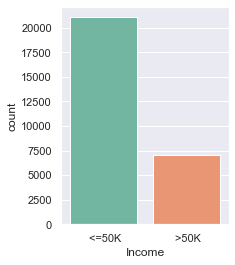

In [177]:
#plotting each class frequency
fig = plt.figure(figsize=(3,4))
sns.set_theme(style="darkgrid")
ax = sns.countplot(x="Income",palette="Set2", data=df, order = df["Income"].value_counts().index)
plt.show()

In [178]:
#check the shape of our dataset
print('Actual shape of our Dataset now :-------->', df.shape)

Actual shape of our Dataset now :--------> (28111, 13)


In [179]:
lab_enc = LabelEncoder() #using Label Encoder to transform our column data
df['Workclass'] = pd.Series(lab_enc.fit_transform(df['Workclass']))
df['Education'] = pd.Series(lab_enc.fit_transform(df['Education']))
df['Marital_status'] = pd.Series(lab_enc.fit_transform(df['Marital_status']))
df['Occupation'] = pd.Series(lab_enc.fit_transform(df['Occupation']))
df['Relationship'] = pd.Series(lab_enc.fit_transform(df['Relationship']))
df['Race'] = pd.Series(lab_enc.fit_transform(df['Race']))
df['Sex'] = pd.Series(lab_enc.fit_transform(df['Sex']))
df['Native_country'] = pd.Series(lab_enc.fit_transform(df['Native_country']))
df['Income'] = pd.Series(lab_enc.fit_transform(df['Income']))

In [180]:
df.isnull().sum() # check the null values

Age                  0
Workclass         3826
Fnlwgt               0
Education         3826
Education_num        0
Marital_status    3826
Occupation        3826
Relationship      3826
Race              3826
Sex               3826
Hours_per_week       0
Native_country    3826
Income            3826
dtype: int64

In [181]:
df.dropna(inplace=True)#drop the null values

In [182]:
df.isnull().sum() #now, check the null values

Age               0
Workclass         0
Fnlwgt            0
Education         0
Education_num     0
Marital_status    0
Occupation        0
Relationship      0
Race              0
Sex               0
Hours_per_week    0
Native_country    0
Income            0
dtype: int64

correlation between the Features and with label:-----> (13, 13)

 **************************************************


<function matplotlib.pyplot.show(close=None, block=None)>

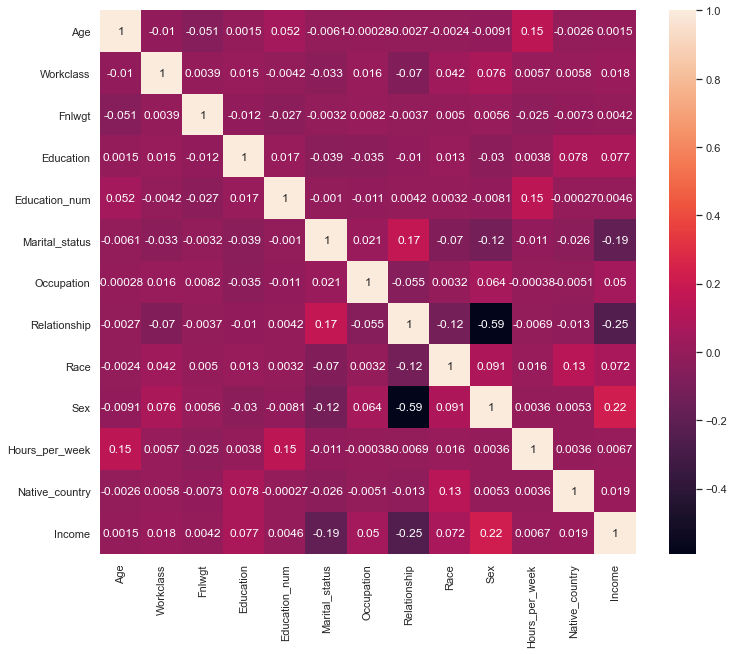

In [183]:
# analyize the correlation
corr = df.corr()
print('correlation between the Features and with label:----->',corr.shape)
print("\n",'*'*50)
# Visualize the corrrelation by using heatmap
plt.figure(figsize=(12,10))
sns.heatmap(corr, annot=True)
plt.show

In [184]:
#split x and y
x = df.drop(['Income'], axis=1)
y=df.Income

In [185]:
#scale the value x
Scaler = StandardScaler()
x_scaled = Scaler.fit_transform(x)
x_scaled

array([[ 0.95031667,  1.89051848, -1.11775737, ...,  0.69769338,
        -2.37592727,  0.25905259],
       [-0.01078444, -0.20962521,  0.51073019, ...,  0.69769338,
        -0.09170741,  0.25905259],
       [ 1.19059194, -0.20962521,  0.74546326, ...,  0.69769338,
        -0.09170741,  0.25905259],
       ...,
       [-1.0519773 , -0.20962521,  0.24173779, ..., -1.43329438,
         0.75429995,  0.25905259],
       [-0.33115147, -0.20962521, -0.20522104, ...,  0.69769338,
         0.33129627,  0.25905259],
       [ 0.79013315,  0.84044663, -0.40156002, ..., -1.43329438,
         0.33129627,  0.25905259]])

In [186]:
# Check the multicollinearity between the features
#import library for VIF
from statsmodels.stats.outliers_influence import variance_inflation_factor
vif = pd.DataFrame()
vif["vif"]= [ variance_inflation_factor(x_scaled, i)
               for i in range ( x_scaled.shape[1])]
vif['features']= x.columns
vif #no multicollinearity between the features

,vif,features
0,1.026768,Age
1,1.008812,Workclass
2,1.003681,Fnlwgt
3,1.011252,Education
4,1.025500,Education_num
5,1.036853,Marital_status
6,1.006928,Occupation
7,1.575958,Relationship
8,1.036593,Race
9,1.547754,Sex


In [187]:
#split data into train and test.
x_train, x_test, y_train, y_test = train_test_split(x_scaled, y,test_size = 0.25, random_state=13)

In [188]:
y_train.head()

7569     0.0
1535     0.0
5419     1.0
16256    0.0
20814    1.0
Name: Income, dtype: float64

# Check the Accuracy by using 5 classification models

In [189]:
log_reg = LogisticRegression() #Model instantiating
dt = DecisionTreeClassifier()
rf= RandomForestClassifier()
knn = KNeighborsClassifier()
svc = SVC()

In [190]:
#train the model
log_reg.fit(x_train,y_train)
dt.fit(x_train,y_train)
rf.fit(x_train,y_train)
knn.fit(x_train,y_train)
svc.fit(x_train,y_train)
print("all models are trained")

all models are trained


In [191]:
log_reg.score(x_test,y_test) #Let's check how well model fits the test data
dt.score(x_test,y_test)
rf.score(x_test,y_test)
knn.score(x_test,y_test)
svc.score(x_test,y_test)
print("all models score are captured")

all models score are captured


In [192]:
y_pred_log_reg = log_reg.predict(x_test) #save the predictions in some variables
y_pred_dt = dt.predict(x_test) 
y_pred_rf = rf.predict(x_test) 
y_pred_knn = knn.predict(x_test) 
y_pred_svc = svc.predict(x_test) 

In [193]:
#check the accuracy score, confusion matrix and classification report
print('Accuracy_score of Logistic regression:-------->  ',accuracy_score(y_test,y_pred_log_reg))
time.sleep(2)
print('Confusion_matrix:\n' , confusion_matrix(y_test,y_pred_log_reg))
time.sleep(2)
print('Classification_report:\n' , classification_report(y_test,y_pred_log_reg))

time.sleep(2)
print("\n",'*'*50)
print("\n",'*'*50)
time.sleep(2)


print('Accuracy_score of Decision Tree:-------->  ',accuracy_score(y_test,y_pred_dt))
time.sleep(2)
print('Confusion_matrix:\n' , confusion_matrix(y_test,y_pred_dt))
time.sleep(2)
print('Classification_report:\n' , classification_report(y_test,y_pred_dt))

time.sleep(2)
print("\n",'*'*50)
print("\n",'*'*50)
time.sleep(2)

print('Accuracy_score of Random forest:-------->  ',accuracy_score(y_test,y_pred_rf))
time.sleep(2)
print('Confusion_matrix:\n' , confusion_matrix(y_test,y_pred_rf))
time.sleep(2)
print('Classification_report:\n' , classification_report(y_test,y_pred_rf))

time.sleep(2)
print("\n",'*'*50)
print("\n",'*'*50)
time.sleep(2)

print('Accuracy_score of KNeighbors Classifiers:-------->  ',accuracy_score(y_test,y_pred_knn))
time.sleep(2)
print('Confusion_matrix:\n' , confusion_matrix(y_test,y_pred_knn))
time.sleep(2)
print('Classification_report:\n' , classification_report(y_test,y_pred_knn))

time.sleep(2)
print("\n",'*'*50)
print("\n",'*'*50)
time.sleep(2)

print('Accuracy_score of Support Vector Machine:-------->  ',accuracy_score(y_test,y_pred_svc))
time.sleep(2)
print('Confusion_matrix:\n' , confusion_matrix(y_test,y_pred_svc))
time.sleep(2)
print('Classification_report:\n' , classification_report(y_test,y_pred_svc))

Accuracy_score of Logistic regression:-------->   0.7470355731225297
Confusion_matrix:
 [[4524   39]
 [1497   12]]
Classification_report:
               precision    recall  f1-score   support

         0.0       0.75      0.99      0.85      4563
         1.0       0.24      0.01      0.02      1509

    accuracy                           0.75      6072
   macro avg       0.49      0.50      0.44      6072
weighted avg       0.62      0.75      0.65      6072


 **************************************************

 **************************************************
Accuracy_score of Decision Tree:-------->   0.7422595520421608
Confusion_matrix:
 [[3760  803]
 [ 762  747]]
Classification_report:
               precision    recall  f1-score   support

         0.0       0.83      0.82      0.83      4563
         1.0       0.48      0.50      0.49      1509

    accuracy                           0.74      6072
   macro avg       0.66      0.66      0.66      6072
weighted avg       0.74

In [194]:
#check all model cv score
print("Logistic regression CV Score:")
print(cross_val_score(log_reg,x_scaled,y,cv=5))

time.sleep(2)
print("\n",'*'*50)

print("Decision Tree CV Score:")
print(cross_val_score(dt,x_scaled,y,cv=5))

time.sleep(2)
print("\n",'*'*50)

print("Random Forest CV Score:")
print(cross_val_score(rf,x_scaled,y,cv=5))

time.sleep(2)
print("\n",'*'*50)

print("KNeighbour Classifier CV Score:")
print(cross_val_score(knn,x_scaled,y,cv=5))

time.sleep(2)
print("\n",'*'*50)

print("Support Vector Machine CV Score:")
print(cross_val_score(svc,x_scaled,y,cv=5))

Logistic regression CV Score:
[0.74613959 0.74531604 0.74840436 0.74675726 0.74861025]

 **************************************************
Decision Tree CV Score:
[0.74840436 0.74572782 0.75396335 0.76714021 0.75211036]

 **************************************************
Random Forest CV Score:
[0.81058266 0.80770023 0.81120033 0.82170064 0.80975911]

 **************************************************
KNeighbour Classifier CV Score:
[0.75993412 0.76508133 0.76796376 0.76569899 0.76137533]

 **************************************************
Support Vector Machine CV Score:
[0.76590488 0.76055178 0.76631666 0.76240478 0.76364011]


In [195]:
#Check the mean of all models cv score one by one
print("Logistic regression CV Score:")
print(cross_val_score(log_reg,x_scaled,y,cv=5).mean())

time.sleep(2)
print("\n",'*'*50)

print("Decision Tree CV Score:")
print(cross_val_score(dt,x_scaled,y,cv=5).mean())

time.sleep(2)
print("\n",'*'*50)

print("Random Forest CV Score:")
print(cross_val_score(rf,x_scaled,y,cv=5).mean())

time.sleep(2)
print("\n",'*'*50)

print("KNeighbour Classifier CV Score:")
print(cross_val_score(knn,x_scaled,y,cv=5).mean())

time.sleep(2)
print("\n",'*'*50)

print("Support Vector Machine CV Score:")
print(cross_val_score(svc,x_scaled,y,cv=5).mean())

Logistic regression CV Score:
0.7470455013382746

 **************************************************
Decision Tree CV Score:
0.7533456866378423

 **************************************************
Random Forest CV Score:
0.8119415276919909

 **************************************************
KNeighbour Classifier CV Score:
0.7640107061972412

 **************************************************
Support Vector Machine CV Score:
0.763763640107062


In [196]:
# Plot ROC/AUC for multiple models

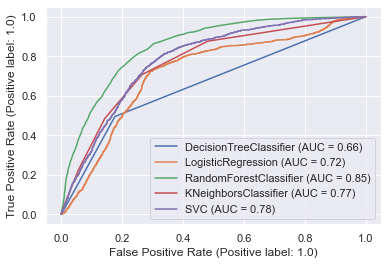

In [197]:
#how well out model works on test data
disp = plot_roc_curve(dt,x_test,y_test)
plot_roc_curve(log_reg,x_test,y_test, ax= disp.ax_)
plot_roc_curve(rf,x_test,y_test, ax= disp.ax_)
plot_roc_curve(knn,x_test,y_test, ax= disp.ax_)
plot_roc_curve(svc,x_test,y_test, ax= disp.ax_)
plt.show()

# GridSearchCV By using Knn as a estimator

In [197]:
param_grid = {'algorithm':['kdtree','brute'], 'leaf_size':[12,11,14,15,18,20,25], 'n_neighbors':[3,5,7,9,11,13]}
gridsearch = GridSearchCV(estimator=knn, param_grid= param_grid) #apply GridSearchCV
time.sleep(2)
print(gridsearch.fit(x_train,y_train)) #train the model
time.sleep(1)
print("\n",'*'*50)
time.sleep(1)
print('GridSearchCV best parameters:----->',gridsearch.best_params_) #get best parameters
time.sleep(1)
print("\n",'*'*50)
time.sleep(1)
#put best params into knn
knn1 = gridsearch.best_estimator_ #save that best param into one variable
print('Trained Model using best parameters:----->',knn1.fit(x_train,y_train))#train the model
time.sleep(1)
print("\n",'*'*50)
time.sleep(1)
print('Accuracy score:------>',knn1.score(x_train,y_train)) #check the accuracy score

GridSearchCV(estimator=KNeighborsClassifier(),
             param_grid={'algorithm': ['kdtree', 'brute'],
                         'leaf_size': [12, 11, 14, 15, 18, 20, 25],
                         'n_neighbors': [3, 5, 7, 9, 11, 13]})

 **************************************************
GridSearchCV best parameters:-----> {'algorithm': 'brute', 'leaf_size': 12, 'n_neighbors': 13}

 **************************************************
Trained Model using best parameters:-----> KNeighborsClassifier(algorithm='brute', leaf_size=12, n_neighbors=13)

 **************************************************
Accuracy score:------> 0.812441662548729


# GridSearchCV By using SVC as a estimator

In [ ]:
param_grid = {'C': [1,2,4,5,6,7,8,9,10],         
             'gamma': [0.2,0.3,0.4,0.5,0.6,0.7,0.8],
             'kernel': ['rbf']}
gridsearch = GridSearchCV(estimator=svc, param_grid= param_grid)#apply GridSearchCV
time.sleep(2)
print(gridsearch.fit(x_train,y_train)) #train the model
time.sleep(1)
print("\n",'*'*50)
time.sleep(1)
print('GridSearchCV best parameters:----->',gridsearch.best_params_) #get best parameters
time.sleep(1)
print("\n",'*'*50)
time.sleep(1)
#put best params into svc
svc1 = gridsearch.best_estimator_#save that best param into one variable
print('Trained Model using best parameters:----->',svc1.fit(x_train,y_train))#train the model
time.sleep(1)
print("\n",'*'*50)
time.sleep(1)
print('Accuracy score:------>',svc1.score(x_train,y_train))#check the accuracy score

# GridSearchCV By using RandomForestClassifier as a estimator

In [ ]:
params = {'n_estimators':[13,15],
         'criterion':['entropy'],
         'max_depth':[10,15],
         'min_samples_split':[10,11],
         'min_samples_leaf':[5,6]}
gridsearch = GridSearchCV(estimator=rf, param_grid= params)#apply GridSearchCV
time.sleep(2)
print(gridsearch.fit(x_train,y_train)) #train the model
time.sleep(1)
print("\n",'*'*50)
time.sleep(1)
print('GridSearchCV best parameters:----->',gridsearch.best_params_) #get best parameters
time.sleep(1)
print("\n",'*'*50)
time.sleep(1)
#put best params into knn
rfc = gridsearch.best_estimator_
print('Trained Model using best parameters:----->',rfc.fit(x_train,y_train)) #train the model
time.sleep(1)
print("\n",'*'*50)
time.sleep(1)
print('Accuracy score:------>',rfc.score(x_train,y_train))#check the accuracy score

# GridSearchCV By using DecisionTreeClassifier as a estimator

In [ ]:
params = {'criterion':['entropy','gini'],
         'max_depth':range(10,15),
         'min_samples_split':[3,10],
         'min_samples_leaf':[2,10]}
gridsearch = GridSearchCV(estimator=dt, param_grid= params)#apply GridSearchCV
time.sleep(2)
print(gridsearch.fit(x_train,y_train)) #train the model
time.sleep(1)
print("\n",'*'*50)
time.sleep(1)
print('GridSearchCV best parameters:----->',gridsearch.best_params_) #get best parameters
time.sleep(1)
print("\n",'*'*50)
time.sleep(1)
#put best params into knn
dtr = gridsearch.best_estimator_
print('Trained Model using best parameters:----->',dtr.fit(x_train,y_train))#train the model
time.sleep(1)
print("\n",'*'*50)
time.sleep(1)
print('Accuracy score:------>',dtr.score(x_train,y_train))#check the accuracy score

# Bagging Classifier with Bootstrap = True (Using 4 models)

Using knn as a best estimator

In [ ]:
bag_knn = BaggingClassifier(KNeighborsClassifier(n_neighbors=5),
                           n_estimators=10, max_samples=0.5,
                           bootstrap=True, random_state=3,
                           oob_score=True)
time.sleep(2)
print('Model is Trained:- ', bag_knn.fit(x_train,y_train))
time.sleep(1)
print("\n",'*'*50)
time.sleep(1)
print('Accuracy score by using BaggingClassifier:-', bag_knn.score(x_test,y_test))

Using svc as a best estimator

In [ ]:
bag_svc = BaggingClassifier(SVC(),                       #using svc as a best estimator
                           n_estimators=15,
                           bootstrap=True, random_state=5,
                           oob_score=True)
time.sleep(2)
print('Model is Trained:- ', bag_svc.fit(x_train,y_train))
time.sleep(1)
print("\n",'*'*50)
time.sleep(1)
print('Accuracy score by using BaggingClassifier:-', bag_svc.score(x_test,y_test))

Using RandomForestClassifier as a best estimator

In [ ]:
bag_rf = BaggingClassifier(RandomForestClassifier(),#using RandomForest as a best estimator
                           n_estimators=15,
                           bootstrap=True, random_state=7,
                           oob_score=True)
time.sleep(2)
print('Model is Trained:- ', bag_rf.fit(x_train,y_train))
time.sleep(1)
print("\n",'*'*50)
time.sleep(1)
print('Accuracy score by using BaggingClassifier:-', bag_rf.score(x_test,y_test))

Using DecisionTreeClassifier as a best estimator

In [ ]:
bag_dt = BaggingClassifier(dt,                        #using DecisionTree as a best estimator
                           n_estimators=15,
                           bootstrap=True, random_state=7,
                           oob_score=True)
time.sleep(2)
print('Model is Trained:- ', bag_dt.fit(x_train,y_train))
time.sleep(1)
print("\n",'*'*50)
time.sleep(1)
print('Accuracy score by using BaggingClassifier:-', bag_dt.score(x_test,y_test))

# Bagging Classifier with Bootstrap = False (Using 4 models)

Using knn as a best estimator

In [ ]:
bag_knn = BaggingClassifier(KNeighborsClassifier(n_neighbors=5),#using knn as a best estimator
                           n_estimators=10, max_samples=0.5,
                           bootstrap=False, random_state=3,
                           )
time.sleep(2)
print('Model is Trained:- ', bag_knn.fit(x_train,y_train))
time.sleep(1)
print("\n",'*'*50)
time.sleep(1)
print('Accuracy score by using BaggingClassifier:-', bag_knn.score(x_test,y_test))

Using svc as a best estimator

In [ ]:
bag_svc = BaggingClassifier(SVC(),                  #using svc as a best estimator
                           n_estimators=15,
                           bootstrap=False, random_state=5,
                           )
time.sleep(2)
print('Model is Trained:- ', bag_svc.fit(x_train,y_train))
time.sleep(1)
print("\n",'*'*50)
time.sleep(1)
print('Accuracy score by using BaggingClassifier:-', bag_svc.score(x_test,y_test))

Using RandomForestClassifier as a best estimator

In [ ]:
bag_rf = BaggingClassifier(RandomForestClassifier(),   #using RandomForest as a best estimator
                           n_estimators=15,
                           bootstrap=False, random_state=7,
                           )
time.sleep(2)
print('Model is Trained:- ', bag_rf.fit(x_train,y_train))
time.sleep(1)
print("\n",'*'*50)
time.sleep(1)
print('Accuracy score by using BaggingClassifier:-', bag_rf.score(x_test,y_test))

Using DecisionTreeClassifier as a best estimator

In [ ]:
bag_dt = BaggingClassifier(dt,                       #using DecisionTree as a best estimator
                           n_estimators=15,
                           bootstrap=False, random_state=7,
                           )
time.sleep(2)
print('Model is Trained:- ', bag_dt.fit(x_train,y_train))
time.sleep(1)
print("\n",'*'*50)
time.sleep(1)
print('Accuracy score by using BaggingClassifier:-', bag_dt.score(x_test,y_test))

# Saving the model

In [ ]:
We see random forest is giving us better accuracy than others

In [ ]:
with open('Census_income_project','wb') as f:
    pickle.dump(RandomForestClassifier(),f)